# Find in data intersection between dispersions $\sigma$ and gas profiles $\Sigma(R)$

In [1]:
import requests
import time
from IPython.display import HTML
from IPython.display import Image
import pylab as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
class SurveyCard(dict):
    # Overridden dict class which takes a dict
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=40%>"]
        for key, value in sorted(self.iteritems(), reverse=True):
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [6]:
from BeautifulSoup import BeautifulSoup

def get_hyperleda_galaxy_inclination(galaxyname):
    url = 'http://leda.univ-lyon1.fr/ledacat.cgi?o=%s' % galaxyname
    response = requests.get(url)
    if response.ok:
        html = response.content
        soup = BeautifulSoup(html)
        results = soup.findAll("a", {"href" : "leda/param/incl.html"})
        if len(results) > 0:
            incl = float(results[0].findNext('td').contents[0])
            return incl
        else:
            raise Exception('Inclination not found for %s' % galaxyname)

def get_hyperleda_galaxy_type(galaxyname):
    url = 'http://leda.univ-lyon1.fr/ledacat.cgi?o=%s' % galaxyname
    response = requests.get(url)
    if response.ok:
        html = response.content
        soup = BeautifulSoup(html)
        results = soup.findAll("a", {"href" : "leda/param/type.html"})
        if len(results) > 0:
            incl = results[0].findNext('td').contents[0].encode('utf-8').strip()
            return incl
        else:
            print ('Type not found for %s' % galaxyname)

# Astroquery.ned

https://astroquery.readthedocs.io/en/latest/ned/ned.html

In [3]:
from astroquery.ned import Ned

In [4]:
result_table = Ned.query_object("NGC 338")

In [5]:
print result_table

No. Object Name  RA(deg)   ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1    NGC 0338   15.15171 ...              12               8            1


In [6]:
from astropy.io import fits

In [7]:
image_list = Ned.get_image_list("n338")
image_list

[u'http://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0338:I:103aE:dss1.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_HR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_LR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_FR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624cl:I:HI:h2011.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624s30cl:I:HI:h2011.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624s60cl:I:HI:h2011.fits.gz']

In [8]:
image_data = fits.getdata('http://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0338:I:103aE:dss1.fits.gz', ext=0)

In [9]:
image_data.shape

(212L, 212L)

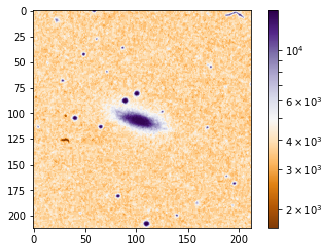

In [10]:
plt.figure()
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap=cm.PuOr, norm=LogNorm())
plt.colorbar()

# Газ

## CARMA EDGE

https://www.astro.umd.edu/~bolatto/EDGE/

In [23]:
carmaedge_card = {'Name' : 'CARMA EDGE', r'$\Sigma_{\rm{H_2}}$' : '+', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$H_{\alpha} (SFR)$' : '+'}
SurveyCard(carmaedge_card)

Name,CARMA EDGE
$\sigma_{s}$,+
$\Sigma_{s}$,+
$\Sigma_{\rm{H_2}}$,+
$H_{\alpha} (SFR)$,+


In [24]:
#extracted from table in article
carmaedge = '''ARP220 15h34m57.
s3 +23◦30009.
007 Sm 5247 66 30 338 78.0
IC0480 07h55m23.
s1 +26◦44034.
000 Sbc 4595 105 77 168 66.3
IC0540 09h30m10.
s2 +07◦54009.
003 Sb 2022 64 68 350 29.9
IC0944 13h51m30.
s9 +14◦05031.
002 Sa 6907 92 75 106 100.8
IC1151 15h58m32.
s5 +17◦26029.
004 SBc B 2192 134 68 204 30.8
IC1199 16h10m34.
s3 +10◦02024.
003 Sbc 4686 71 64 339 68.3
IC1683 01h22m38.
s8 +34◦26013.
001 Sb 4820 79 55 16 69.7
IC2247 08h15m59.
s0 +23◦11058.
005 Sbc 4254 109 78 328 62.0
IC2487 09h30m09.
s2 +20◦05027.
002 Sb 4310 110 78 163 62.3
IC4566 15h36m42.
s1 +43◦32021.
008 SABb B 5537 81 54 145 80.7
IC5376 00h01m19.
s7 +34◦31032.
005 Sab 4979 98 72 3 72.9
NGC0444 01h15m49.
s6 +31◦04048.
007 Sc 4776 94 75 159 70.1
NGC0447 01h15m37.
s5 +33◦04003.
003 S0-a B 5552 133 29 227 79.7
NGC0477 01h21m20.
s3 +40◦29017.
005 Sc B 5796 93 60 140 85.4
NGC0496 01h23m11.
s5 +33◦31044.
000 Sbc 5958 53 57 36 87.5
NGC0523 01h25m20.
s7 +34◦01029.
000 Sbc M 4760 151 72 277 67.9
NGC0528 01h25m33.
s5 +33◦40017.
004 S0 4638 106 61 58 68.8
NGC0551 01h27m40.
s6 +37◦10058.
004 SBbc B 5141 89 64 315 74.5
NGC1167 03h01m42.
s3 +35◦12020.
005 S0 4797 109 40 88 70.9
NGC2253 06h43m41.
s8 +65◦12022.
003 Sc 3545 86 47 300 51.2
NGC2347 07h16m03.
s9 +64◦42038.
008 Sb R 4387 99 50 189 63.7
NGC2410 07h35m02.
s2 +32◦49019.
005 Sb B 4642 130 72 217 67.5
NGC2480 07h57m10.
s4 +23◦46047.
002 SBd BM 2287 79 55 343 33.1
NGC2486 07h57m56.
s4 +25◦09038.
008 Sa 4569 89 56 93 67.5
NGC2487 07h58m20.
s4 +25◦08057.
001 Sb BR 4795 104 31 118 70.5
NGC2623 08h38m24.
s0 +25◦45014.
007 Sb M 5454 45 46 255 80.2
NGC2639 08h43m38.
s0 +50◦12019.
004 Sa R 3168 97 50 314 45.7
NGC2730 09h02m15.
s7 +16◦50017.
008 Sd B 3727 87 28 261 54.8
NGC2880 09h29m34.
s5 +62◦29026.
001 E-S0 B 1530 140 50 323 22.7
NGC2906 09h32m06.
s2 +08◦26029.
007 Sc 2133 81 56 262 37.7
NGC2916 09h34m57.
s5 +21◦42018.
007 Sb 3620 144 50 200 53.2
NGC2918 09h35m44.
s0 +31◦42019.
008 E 6569 93 46 75 96.6
NGC3303 10h37m00.
s1 +18◦08008.
005 Sa M 6040 66 60 160 89.8
NGC3381 10h48m24.
s8 +34◦42041.
000 SBb B 1625 121 31 333 23.4
NGC3687 11h28m00.
s4 +29◦30039.
005 Sbc BR 2497 84 20 326 36.0
NGC3811 11h41m16.
s8 +47◦41026.
008 SBc BR 3073 122 40 352 44.3
NGC3815 11h41m39.
s1 +24◦48001.
004 Sab 3686 86 60 68 53.6
NGC3994 11h57m36.
s7 +32◦16038.
002 Sc RM 3097 51 60 188 44.7
NGC4047 12h02m50.
s6 +48◦38010.
003 Sb 3419 92 42 104 49.1
NGC4149 12h10m32.
s8 +58◦18014.
007 SABc B 3050 82 66 85 44.1
NGC4185 12h13m22.
s0 +28◦30039.
005 SBbc BR 3874 111 48 344 55.9
NGC4210 12h15m15.
s8 +65◦59007.
004 Sb BR 2714 116 41 278 38.8
NGC4211NED02 12h15m37.
s4 +28◦10010.
005 S0-a M 6605 62 30 25 96.9
NGC4470 12h29m37.
s6 +07◦49026.
000 Sa 2338 77 48 350 33.4
NGC4644 12h42m42.
s8 +55◦08043.
007 Sb BM 4915 91 73 57 71.6
NGC4676A 12h46m10.
s2 +30◦43055.
005 S0-a BM 6541 130 50 185 96.6
NGC4711 12h48m45.
s7 +35◦19057.
007 SBb B 4044 72 58 215 58.8
NGC4961 13h05m47.
s7 +27◦44002.
000 SBc B 2521 67 47 100 36.6
NGC5000 13h09m47.
s5 +28◦54024.
004 Sbc BRM 5557 77 20 31 80.8
NGC5016 13h12m06.
s8 +24◦05041.
000 SABb B 2581 94 40 57 36.9
NGC5056 13h16m12.
s3 +30◦57000.
007 Sc 5550 97 61 178 81.1
NGC5205 13h30m03.
s5 +62◦30041.
003 Sbc 1762 95 50 169 25.1
NGC5218 13h32m10.
s3 +62◦46004.
000 SBb B 2888 110 30 236 41.7
NGC5394 13h58m33.
s6 +37◦27012.
005 SBb BM 3431 158 70 189 49.5
NGC5406 14h00m20.
s1 +38◦54055.
004 Sbc B 5350 102 45 111 77.8
NGC5480 14h06m21.
s5 +50◦43030.
003 Sc 1882 100 42 178 27.0
NGC5485 14h07m11.
s2 +55◦00005.
007 S0 1893 151 47 74 26.9
NGC5520 14h12m22.
s6 +50◦20054.
006 Sb 1870 96 59 245 26.7
NGC5614 14h24m07.
s5 +34◦51032.
000 Sab RM 3859 146 36 270 55.7
NGC5633 14h27m28.
s4 +46◦08047.
000 Sb R 2319 65 42 17 33.4
NGC5657 14h30m43.
s5 +29◦10050.
005 Sb BR 3860 105 68 349 56.3
NGC5682 14h34m45.
s1 +48◦40010.
001 Sb B 2242 39 76 311 32.6
NGC5732 14h40m39.
s0 +38◦38015.
007 Sbc 3723 74 58 43 54.0
NGC5784 14h54m16.
s5 +42◦33028.
000 S0 5427 89 45 255 79.4
NGC5876 15h09m31.
s6 +54◦30023.
004 SBab BR 3240 148 66 51 46.9
NGC5908 15h16m43.
s3 +55◦24033.
008 Sb 3294 202 77 153 47.1
NGC5930 15h26m07.
s7 +41◦40033.
009 SABa BM 2637 111 45 155 37.2
NGC5934 15h28m12.
s7 +42◦55047.
006 Sa M 5566 37 55 5 82.7
NGC5947 15h30m36.
s7 +42◦43001.
009 SBbc B 5898 70 32 249 86.1
NGC5953 15h34m32.
s5 +15◦11037.
006 S0-a M 1988 88 26 48 28.4
NGC5980 15h41m30.
s4 +15◦47015.
003 Sbc 4060 98 66 15 59.4
NGC6004 15h50m22.
s5 +18◦56021.
001 Sc B 3818 114 37 272 55.2
NGC6021 15h57m30.
s6 +15◦57021.
005 E 4673 93 43 157 69.1
NGC6027 15h59m12.
s4 +20◦45047.
008 S0-a BM 4338 137 31 231 62.9
NGC6060 16h05m52.
s0 +21◦29005.
006 SABc BR 4398 114 64 102 63.2
NGC6063 16h07m13.
s0 +07◦58043.
009 Sc 2807 98 56 332 40.7
NGC6081 16h12m56.
s8 +09◦52001.
003 S0 4978 93 66 308 73.5
NGC6125 16h19m11.
s6 +57◦59002.
007 E 4522 83 17 5 68.0
NGC6146 16h25m10.
s1 +40◦53033.
003 E 8693 100 41 78 128.7
NGC6155 16h26m08.
s1 +48◦22000.
004 Sc 2418 80 45 130 34.6
NGC6168 16h31m21.
s0 +20◦11007.
008 Sd 2540 99 77 111 36.1
NGC6186 16h34m25.
s6 +21◦32027.
002 Sa B 2940 94 71 70 42.4
NGC6301 17h08m32.
s6 +42◦20020.
003 Sc R 8222 106 53 288 121.4
NGC6310 17h07m57.
s3 +60◦59024.
003 Sb 3459 101 74 70 48.7
NGC6314 17h12m38.
s8 +23◦16012.
007 Sa 6551 82 58 356 95.9
NGC6361 17h18m41.
s0 +60◦36029.
001 Sb 3789 123 75 47 54.9
NGC6394 17h30m21.
s6 +59◦38023.
006 SBb B 8444 69 60 232 124.3
NGC6478 17h48m38.
s1 +51◦09025.
009 Sc 6797 87 73 29 97.4
NGC7738 23h44m02.
s0 +00◦31000.
001 Sb B 6682 71 66 235 97.8
NGC7819 00h04m24.
s4 +31◦28019.
002 Sb B 4918 86 54 270 71.6
UGC00809 01h15m51.
s8 +33◦48038.
005 Sc 4171 71 79 19 60.4
UGC03253 05h19m41.
s6 +84◦03008.
000 Sb BR 4040 82 58 268 59.5
UGC03539 06h48m53.
s9 +66◦15040.
006 Sbc B 3278 110 72 303 47.1
UGC03969 07h41m14.
s3 +27◦36050.
007 Sc 8037 76 70 134 118.4
UGC03973 07h42m32.
s5 +49◦48035.
002 Sb B 6594 80 39 144 95.9
UGC04029 07h48m19.
s0 +34◦19055.
009 Sbc B 4389 108 78 58 63.5
UGC04132 07h59m13.
s0 +32◦54053.
006 Sbc 5151 74 72 213 75.4
UGC04280 08h14m33.
s3 +54◦47058.
002 Sa 3500 79 72 184 50.9
UGC04461 08h33m22.
s6 +52◦31056.
002 Sbc 4941 83 70 223 72.3
UGC05108 09h35m26.
s3 +29◦48045.
003 SBab B 8015 66 66 136 118.4
UGC05111 09h36m52.
s4 +66◦47018.
002 Sbc 6660 90 73 118 98.2
UGC05244 09h48m48.
s1 +64◦10004.
008 Sc 2974 90 78 33 43.7
UGC05359 09h58m51.
s6 +19◦12053.
000 SABb B 8344 93 72 94 123.2
UGC05498NED01 10h12m03.
s6 +23◦05007.
004 Sa M 6250 94 81 62 91.8
UGC05598 10h22m14.
s1 +20◦35021.
008 Sbc 5591 76 75 216 81.1
UGC06312 11h18m00.
s0 +07◦50040.
007 Sa B 6266 71 69 225 90.0
UGC07012 12h02m03.
s1 +29◦50053.
001 SBc B 3052 65 60 184 44.3
UGC08107 12h59m39.
s8 +53◦20028.
006 IB B 8201 137 71 228 121.6
UGC08250 13h10m20.
s2 +32◦28057.
003 Sc 5169 79 76 12 76.0
UGC08267 13h11m11.
s4 +43◦43035.
004 Sb 7159 67 75 223 103.7
UGC09067 14h10m45.
s4 +15◦12033.
001 Sab 7740 49 62 15 114.5
UGC09476 14h41m31.
s9 +44◦30045.
007 SABc B 3243 90 48 307 46.6
UGC09537 14h48m26.
s6 +34◦59052.
007 Sb 8662 134 72 136 130.1
UGC09542 14h49m01.
s2 +42◦27050.
003 Sc 5413 86 73 214 79.7
UGC09665 15h01m32.
s5 +48◦19011.
002 Sbc 2561 102 74 138 36.5
UGC09759 15h10m40.
s8 +55◦21001.
004 Sb 3394 80 67 50 49.2
UGC09873 15h29m50.
s6 +42◦37044.
003 Sc 5575 80 75 129 91.5
UGC09892 15h32m52.
s0 +41◦11029.
000 Sb 5591 78 72 101 82.2
UGC09919 15h35m39.
s4 +12◦36022.
006 Sc 3160 89 78 349 47.1
UGC10043 15h48m41.
s4 +21◦52010.
001 Sbc 2154 132 90 328 31.0
UGC10123 15h59m02.
s7 +51◦18016.
005 Sab 3738 69 70 235 53.8
UGC10205 16h06m40.
s3 +30◦05056.
004 Sa 6491 87 52 129 94.9
UGC10331 16h17m21.
s1 +59◦19012.
003 Sb 4415 87 76 141 64.8
UGC10380 16h25m49.
s7 +16◦34033.
009 Sb 8624 93 78 288 110.8
UGC10384 16h26m46.
s6 +11◦34048.
007 Sab 4929 70 70 278 71.8
UGC10710 17h06m52.
s5 +43◦07019.
005 Sb 8228 100 70 330 121.7'''

In [25]:
carmaedge = carmaedge.split('\n')[0::3]

In [26]:
len(carmaedge)

126

In [27]:
carmaedge = [l.split(' ')[0] for l in carmaedge]

In [28]:
carmaedge

['ARP220',
 'IC0480',
 'IC0540',
 'IC0944',
 'IC1151',
 'IC1199',
 'IC1683',
 'IC2247',
 'IC2487',
 'IC4566',
 'IC5376',
 'NGC0444',
 'NGC0447',
 'NGC0477',
 'NGC0496',
 'NGC0523',
 'NGC0528',
 'NGC0551',
 'NGC1167',
 'NGC2253',
 'NGC2347',
 'NGC2410',
 'NGC2480',
 'NGC2486',
 'NGC2487',
 'NGC2623',
 'NGC2639',
 'NGC2730',
 'NGC2880',
 'NGC2906',
 'NGC2916',
 'NGC2918',
 'NGC3303',
 'NGC3381',
 'NGC3687',
 'NGC3811',
 'NGC3815',
 'NGC3994',
 'NGC4047',
 'NGC4149',
 'NGC4185',
 'NGC4210',
 'NGC4211NED02',
 'NGC4470',
 'NGC4644',
 'NGC4676A',
 'NGC4711',
 'NGC4961',
 'NGC5000',
 'NGC5016',
 'NGC5056',
 'NGC5205',
 'NGC5218',
 'NGC5394',
 'NGC5406',
 'NGC5480',
 'NGC5485',
 'NGC5520',
 'NGC5614',
 'NGC5633',
 'NGC5657',
 'NGC5682',
 'NGC5732',
 'NGC5784',
 'NGC5876',
 'NGC5908',
 'NGC5930',
 'NGC5934',
 'NGC5947',
 'NGC5953',
 'NGC5980',
 'NGC6004',
 'NGC6021',
 'NGC6027',
 'NGC6060',
 'NGC6063',
 'NGC6081',
 'NGC6125',
 'NGC6146',
 'NGC6155',
 'NGC6168',
 'NGC6186',
 'NGC6301',
 'NGC6310

In [29]:
%%time
for carmaname in carmaedge:
    print carmaname
    result_table = Ned.query_object(carmaname)
    print result_table[0]
    print '\n'

ARP220
No. Object Name      RA(deg)            DEC(deg)      Type  Velocity   Redshift  Redshift Flag Magnitude and Filter Distance (arcmin) References Notes Photometry Points Positions Redshift Points Diameter Points Associations
                     degrees            degrees              km / s                                                        arcm                                                                                                
--- ----------- ------------------ ------------------ ---- ---------- ---------- ------------- -------------------- ----------------- ---------- ----- ----------------- --------- --------------- --------------- ------------
  1     ARP 220 233.73856000000001 23.503139999999998    G     5434.0   0.018126                              13.94                --        999    23               342        45              37               8            1


IC0480
No. Object Name  RA(deg)        DEC(deg)      Type  Velocity        Redshift       Redsh

In [40]:
carma_set = []
for carmaname in carmaedge:
    result_table = Ned.query_object(carmaname)
    carma_set.append(result_table[0]['Object Name'])

In [19]:
%%time
incls = []
for carmaname in carmaedge:
    incl = get_hyperleda_galaxy_inclination(carmaname)
    time.sleep(1)
    incls.append(incl)

Wall time: 3min 17s


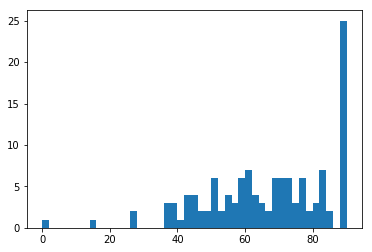

In [20]:
plt.hist(incls, bins=45);

In [21]:
len(incls)

126

## WHISP

http://www.astro.rug.nl/~whisp/Database/OverviewCatalog/ListByName/listing_by_name.html

In [28]:
whisp_card = {'Name' : 'WHISP', r'$\Sigma_{\rm{HI}}$' : '+'}

In [29]:
SurveyCard(whisp_card)

Name,WHISP
$\Sigma_{\rm{HI}}$,+


In [30]:
whisp_url = 'http://www.astro.rug.nl/~whisp/Database/OverviewCatalog/ListByName/listing_by_name.html'
html = requests.get(whisp_url).content

In [31]:
from BeautifulSoup import BeautifulSoup
soup = BeautifulSoup(html)

In [32]:
whisp_galaxies = []
for gal in soup.findAll('a', target="_top")[2:]:
    g = str(gal.string)
    whisp_galaxies.append(int(g.replace('/', ' ').replace('(', ' ').replace('\x08', ' ').split(' ')[2]))

In [33]:
len(unique(whisp_galaxies))

342

In [34]:
print ['UGC ' + str(l) for l in whisp_galaxies]

['UGC 79', 'UGC 89', 'UGC 94', 'UGC 192', 'UGC 232', 'UGC 485', 'UGC 499', 'UGC 508', 'UGC 528', 'UGC 608', 'UGC 622', 'UGC 623', 'UGC 624', 'UGC 624', 'UGC 625', 'UGC 655', 'UGC 690', 'UGC 718', 'UGC 731', 'UGC 798', 'UGC 1013', 'UGC 1178', 'UGC 1249', 'UGC 1256', 'UGC 1281', 'UGC 1286', 'UGC 1305', 'UGC 1310', 'UGC 1313', 'UGC 1317', 'UGC 1437', 'UGC 1437', 'UGC 1501', 'UGC 1541', 'UGC 1550', 'UGC 1633', 'UGC 1810', 'UGC 1856', 'UGC 1886', 'UGC 1913', 'UGC 1993', 'UGC 2023', 'UGC 2034', 'UGC 2045', 'UGC 2053', 'UGC 2065', 'UGC 2069', 'UGC 2080', 'UGC 2082', 'UGC 2141', 'UGC 2141', 'UGC 2154', 'UGC 2183', 'UGC 2193', 'UGC 2455', 'UGC 2459', 'UGC 2459', 'UGC 2487', 'UGC 2487', 'UGC 2487', 'UGC 2491', 'UGC 2503', 'UGC 2800', 'UGC 2855', 'UGC 2866', 'UGC 2916', 'UGC 2916', 'UGC 2916', 'UGC 2941', 'UGC 2941', 'UGC 2942', 'UGC 2953', 'UGC 3013', 'UGC 3137', 'UGC 3205', 'UGC 3205', 'UGC 3205', 'UGC 3205', 'UGC 3273', 'UGC 3326', 'UGC 3334', 'UGC 3344', 'UGC 3354', 'UGC 3371', 'UGC 3382', 'U

## THINGS

The HI Nearby Galaxy Survey http://www.mpia.de/THINGS/Data.html

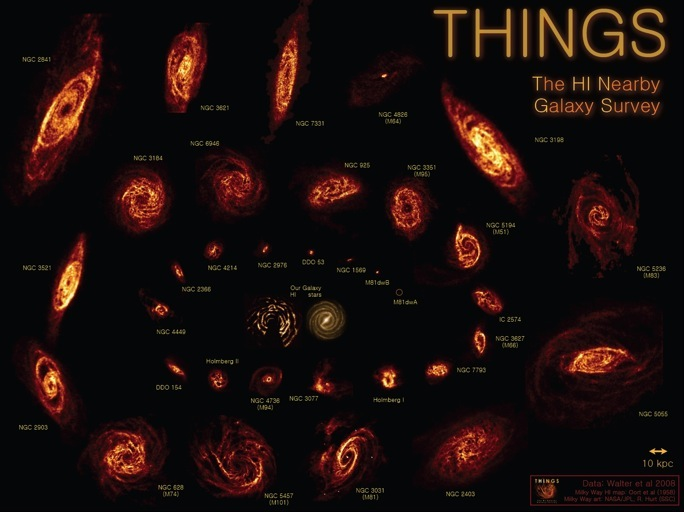

In [35]:
Image('http://www.mpia.de/THINGS/THINGS_Poster_files/droppedImage.jpg')

In [30]:
things_card = {'Name' : 'THINGS', r'$\Sigma_{\rm{HI}}$' : '+', r'$\sigma_{\rm{HI}}$' : '+'}

In [31]:
SurveyCard(things_card)

Name,THINGS
$\sigma_{\rm{HI}}$,+
$\Sigma_{\rm{HI}}$,+


In [32]:
things = ['NGC 628',
'NGC 925',
'NGC 1569',
'NGC 2366',
'NGC 2403',
'Ho II',
'M81 DwA',
'DDO 53',
'NGC 2841',
'NGC 2903',
'Ho I',
'NGC 2976',
'NGC 3031',
'NGC 3077',
'M81 DwB',
'NGC 3184',
'NGC 3198',
'IC 2574',
'NGC 3351',
'NGC 3521',
'NGC 3621',
'NGC 3627',
'NGC 4214',
'NGC 4449',
'NGC 4736',
'DDO 154',
'NGC 4826',
'NGC 5055',
'NGC 5194',
'NGC 5236',
'NGC 5457',
'NGC 6946',
'NGC 7331',
'NGC 7793']

In [33]:
%%time
for thing in things:
    print thing
    result_table = Ned.query_object(thing)
    print result_table[0]
    print '\n'

NGC 628
No. Object Name      RA(deg)            DEC(deg)      Type  Velocity         Redshift       Redshift Flag Magnitude and Filter Distance (arcmin) References Notes Photometry Points Positions Redshift Points Diameter Points Associations
                     degrees            degrees              km / s                                                                   arcm                                                                                                
--- ----------- ------------------ ------------------ ---- ---------- --------------------- ------------- -------------------- ----------------- ---------- ----- ----------------- --------- --------------- --------------- ------------
  1 MESSIER 074 24.173950000000001 15.783659999999999    G      657.0 0.0021919999999999999                               9.95                --       1049    21               229        42              21               8            0


NGC 925
No. Object Name      RA(deg)            DE

In [41]:
thing_set = []
for thing in things:
    result_table = Ned.query_object(thing)
    thing_set.append(result_table[0]['Object Name'])

In [ ]:
intersect = set(carma_set).intersection(thing_set)
intersect

## SAMI

есть дисперсии газа вроде (да, как минимум отдельно обработанная выборка тут https://arxiv.org/pdf/1601.02022.pdf), но очень маленькая область. Данные ~~есть~~ **были** для ~100 объектов.

Теперь релизнулся каталог, https://arxiv.org/pdf/1707.08402.pdf, там ~770 объектов. Очень маленькие области и не ясно, что за газ - но есть дисперсии! Это важно.

**Однако оказалось, что это дисперсии ионизованного газа, что не есть хорошо.**

In [3]:
sami_card = {'Name' : 'SAMI', r'$SFR$' : '+', r'$\sigma_{g, ion}$' : '+', r'$V_g$' : '+'}
SurveyCard(sami_card)

Name,SAMI
"$\sigma_{g, ion}$",+
$V_g$,+
$SFR$,+


In [67]:
# sami = [
# '2MASX J08444542+0211080',
# '2MASX J08445895+0203060',
# '2MASX J08445921+0228350',
# 'SDSS J084517.68+021650.0',
# '2MASX J08453179+0228336',
# 'SDSS J084637.68+023651.7',
# '2MASX J08464363+0150354',
# '2MASX J08465431+0233361',
# '2MASX J08471547+0153441',
# 'SDSS J084728.99+021637.5',
# 'GAMA 422683',
# 'SDSS J084825.61+021716.1',
# '2MASX J08483006+0010151',
# '2MASX J08484561+0017289',
# 'GAMA 203037',
# '2MASX J08493279-0005002',
# 'SDSS J085000.61-001056.2',
# '2MASX J08500161+0013326',
# '2MASX J08503171+0019082',
# '2MASX J08503260-0015101',
# '2MASX J08505842-0013434',
# 'CGCG 005-017',
# 'SDSS J085121.63-002342.5',
# '2MASX J08513652+0016235',
# 'CGCG 006-027',
# 'SDSS J091833.93+012037.5',
# 'SDSS J091849.99+010122.7',
# '2MFGC 07229',
# 'GALEXASC J091858.14+013352.4',
# '2MASX J09190412+0110453',
# 'SDSS J091906.31+004039.4',
# 'SDSS J091910.38+010319.7',
# '2MASX J09191636+0102106',
# 'SDSS J091942.13+011932.9',
# 'SDSS J091955.94+003828.6',
# 'GAMA 218717',
# 'SDSS J091958.88+005739.0',
# 'SDSS J092002.40+005039.1',
# 'SDSS J092012.55+010908.3',
# 'GALEXMSC J092015.56+014716.9',
# 'SDSS J092021.96+004924.5',
# 'SDSS J092031.46+005613.2',
# 'SDSS J092033.28+004315.7',
# 'SDSS J092034.36+013303.9',
# 'SDSS J092037.21+004921.7',
# 'SDSS J092046.17+003616.9',
# 'SDSS J092123.80+011033.9',
# '*2MASX J12034435+0150095',
# '*UGC 07042',
# '2MASX J12040196+0126415',
# '*NGC 4063',
# 'SDSS J120407.42+013459.3',
# 'NGC 4073',
# 'SDSS J120430.27+014102.4',
# 'SDSS J120444.63+014245.0',
# 'SDSS J120445.36+015512.6',
# 'SDSS J120448.72+013847.3',
# 'SDSS J120456.91+013029.6',
# 'SDSS J120522.07+015004.5',
# 'CGCG 018-062',
# 'SDSS J141032.73-005030.6',
# 'SDSS J141100.80-005414.1',
# '2dFGRS N274Z062',
# 'SDSS J141110.36-001709.8',
# 'SDSS J141112.02-005802.5',
# 'SDSS J141120.29-002950.7',
# 'SHOC 452',
# 'SDSS J141212.88-005046.9',
# 'CGCG 018-079 NED01',
# 'GALEXASC J141250.09-004402.5',
# 'UM 647',
# 'SDSS J141453.62+002426.2',
# '2MASX J14152834+0013384',
# 'CGCG 018-104',
# 'CGCG 018-103',
# '2MASX J14170455-0015086',
# '2MASX J14170767-0000546',
# 'SDSS J141721.25-001008.5',
# 'CGCG 018-107',
# '2MASX J14173511+0009328',
# '2MASX J14175124+0019098',
# '2MASX J14180218+0029037',
# 'SDSS J141805.48+001338.5',
# 'SDSS J142336.60-010336.9',
# 'SDSS J142358.19-010742.3',
# '2MASX J14241764-0135030',
# '2MASX J14242424-0145540',
# '2MASX J14243031-0137420',
# 'CGCG 019-019',
# 'CGCG 019-022',
# '2MASX J14253466-0122336',
# '2MASX J14260079-0124431',
# '2MASX J14260486-0132201',
# '2MASX J14260877-0112077',
# 'SDSS J142623.70-013537.4',
# 'SDSS J144926.88-000951.1',
# 'GALEXMSC J144944.90-001428.4',
# '2MASX J14500368+0005506',
# '2MASX J14505461+0001405',
# 'SDSS J145058.07+000531.8',
# '2MASX J14510301-0031374',
# '2MASX J14510387-0027434',
# 'SDSS J145109.68-000728.2',
# 'SDSS J145113.68+000140.6',
# 'SDSS J145153.48-004324.4',
# '2MASX J14521940-0016095',
# '2MASX J14523193-0009585']

In [7]:
df = pd.read_csv('sami_overview.csv')

In [8]:
df.head()

,ID,IAU Identifier,Catalog Coordinate Ra,Catalog Coordinate Dec,mag r-band Petrosian,mag r-band Auto,Redshift (Heliocentric),Redshift (Flow Corrected),Absolute Mag r-band Auto,r-band Effective Radius,Surface Brightness (1R_e_AVG),Surface Brightness (1R_e),Surface Brightness (2R_e),Ellipticity r-band,Position Angle r-band,Stellar Mass,Colour Auto g-i,Galactic extinction g-band,Priority Class,Bad Class
0,7715,J115654.89+004326.1,179.22873,0.72392,15.966,15.820,0.07798,0.07927,-22.06,4.28,20.90,22.34,23.90,0.2308,74.40,10.99,1.29,0.073,8,0
1,7841,J115826.11+004247.1,179.60883,0.71311,15.477,15.800,0.07852,0.07981,-22.07,2.74,18.99,19.99,21.65,0.6845,62.02,10.96,1.24,0.085,8,0
2,8353,J120803.95+004151.3,182.01649,0.69761,15.618,15.440,0.01967,0.02147,-19.41,5.37,20.90,21.43,23.42,0.3726,58.87,9.44,0.56,0.093,8,0
3,8391,J120831.01+004509.3,182.12925,0.75260,17.927,17.928,0.02035,0.02205,-16.98,1.64,20.79,21.81,23.47,0.1988,46.16,8.81,0.99,0.095,8,0
4,8404,J120852.97+004220.0,182.22071,0.70557,17.907,17.852,0.01885,0.02077,-16.92,4.07,22.62,23.50,25.21,0.1941,71.28,8.75,0.94,0.094,8,0


In [13]:
df.shape

(772, 20)

In [20]:
sami = df[u' IAU Identifier'].values

In [22]:
%%time

bad_ind = 0
sami_set = []
for s in sami:
    try:
        result_table = Ned.query_object('SDSS '+s)
        sami_set.append(result_table[0]['Object Name'])
    except Exception:
        print s
        bad_ind+=1
        
print bad_ind

J120852.97+004220.0
J121032.60+004039.0
J121109.76+004708.7
J121119.88+004817.1
J120834.05+011205.9
J120917.26+010905.6
J122208.95+010645.9
J114928.80-010543.4
J114032.18-004010.6
J121754.76-004441.0
J121810.60-004441.9
J140834.28-004723.3
J141250.05-004403.4
J145153.34-004324.4
J113950.75-002455.4
J144944.93-001428.4
J145050.95+000533.3
J145113.81+000140.6
J120928.65+003159.7
J121016.64+003735.7
J141712.95+003201.2
J141802.00+002901.7
J115645.75+010051.2
J120816.48+005546.5
J141803.22+005833.4
J114608.59-014936.5
J114818.18-013825.2
J115817.10-014341.1
J120253.15-014644.8
J120258.18-014208.1
J120326.68-014905.7
J114510.69-012246.1
J120048.97-012351.3
J114810.60-015920.7
J114257.14-013220.8
J120246.62-013536.3
J091903.78-004903.5
J092037.48-004046.0
J084901.58-002056.7
J091846.26-001316.9
J085114.56+001112.9
J091957.77+005044.1
J120305.13+012841.4
J120358.18+012857.9
J120603.12+013317.8
J141124.95+011511.5
J115459.40+015129.2
J120422.61+015202.0
J120618.70+015456.9
J141229.97+013515.7


In [44]:
inters = set(sami_set).intersection(carma_set)
inters

set()

In [45]:
inters = set(sami_set).intersection(thing_set)
inters

set()

## HALOGAS

https://www.aanda.org/articles/aa/pdf/2011/02/aa15938-10.pdf

Не похоже, что там есть что-то полезное

## HERACLES

The HERA CO Line Extragalactic Survey https://www.cv.nrao.edu/~aleroy/HERACLES/Sample.html (я поискал дисперсии в работах, но не нашел - только радиальные профили)

In [97]:
heracles_card = {'Name' : 'IRAM HERACLES', r'$\Sigma_{\rm{HI}}$' : '+', r'$\Sigma_{\rm{H_2}}$' : '+', r'$SFR$' : '+', r'$V_g$' : '+', r'$\Sigma_{s}$' : '?'}

In [41]:
SurveyCard(heracles_card)

Name,IRAM HERACLES
$\Sigma_{\rm{s}}$,?
$\Sigma_{\rm{H_2}}$,+
$\Sigma_{\rm{HI}}$,+
$V_g$,+
$SFR$,+


In [42]:
heracles = [
        'DDO 053',
    'DDO 154',
    'DDO 165',
    'Holmberg I',
    'Holmberg II',
    'IC 2574',
    'M81 Dwarf A',
    'M81 Dwarf B',
    'NGC 0337',
    'NGC 0628',
    'NGC 0925',
    'NGC 2146',
    'NGC 2366',
    'NGC 2403',
    'NGC 2798',
    'NGC 2841',
    'NGC 2903',
    'NGC 2976',
    'NGC 3034',
    'NGC 3049',
    'NGC 3077',
    'NGC 3184',
    'NGC 3190',
    'NGC 3198',
    'NGC 3351',
    'NGC 3521',
    'NGC 3627',
    'NGC 3938',
    'NGC 4214',
    'NGC 4236',
    'NGC 4254',
    'NGC 4321',
    'NGC 4536',
    'NGC 4559',
    'NGC 4569',
    'NGC 4579',
    'NGC 4594',
    'NGC 4625',
    'NGC 4631',
    'NGC 4725',
    'NGC 4736',
    'NGC 5055',
    'NGC 5194',
    'NGC 5457',
    'NGC 5474',
    'NGC 5713',
    'NGC 6946',
    'NGC 7331'
]

In [43]:
%%time
for hera in heracles:
    print hera
    result_table = Ned.query_object(hera)
    print result_table[0]
    print '\n'

DDO 053
No. Object Name  RA(deg)        DEC(deg)      Type  Velocity         Redshift        Redshift Flag Magnitude and Filter Distance (arcmin) References Notes Photometry Points Positions Redshift Points Diameter Points Associations
                 degrees        degrees              km / s                                                                    arcm                                                                                                
--- ----------- ---------- ------------------ ---- ---------- ---------------------- ------------- -------------------- ----------------- ---------- ----- ----------------- --------- --------------- --------------- ------------
  1   UGC 04459     128.53 66.181669999999997    G       20.0 6.7000000000000002e-05                              14.48                --        239     7               105        26              10               6            0


DDO 154
No. Object Name      RA(deg)            DEC(deg)      Type  Velocity  

## IRAM NUGA

Nuclei of Galaxies http://www.mpia.de/NUGA/Nuga_results.html

HI Intensity Maps, CO Intensity Maps

Но как-то все очень разнозненно

## BIMA SONG

https://ned.ipac.caltech.edu/level5/March02/SONG/SONG.html

In [44]:
bima_card = {'Name' : 'BIMA SONG', r'$\Sigma_{\rm{H_2}}$' : '+'}

In [45]:
SurveyCard(bima_card)

Name,BIMA SONG
$\Sigma_{\rm{H_2}}$,+


In [46]:
bima = '''NGC 0628 NGC 0925 NGC 1068 IC 342 NGC 2403 NGC 2841 NGC 2903
NGC 2976 NGC 3031 NGC 3184 NGC 3344 NGC 3351 NGC 3368 NGC 3521
NGC 3627 NGC 3726 NGC 3938 NGC 3953 NGC 3992 NGC 4051 NGC 4258
NGC 4303 NGC 4321 NGC 4414 NGC 4450 NGC 4490 NGC 4535 NGC 4548
NGC 4559 NGC 4569 NGC 4579 NGC 4699 NGC 4725 NGC 4736 NGC 4826
NGC 5005 NGC 5033 NGC 5055 NGC 5194 NGC 5248 NGC 5247 NGC 5457
NGC 6946 NGC 7331'''

## CARMA STING

http://www.astro.umd.edu/~bolatto/STING/

In [47]:
carmasting_card = {'Name' : 'CARMA STING', r'$\Sigma_{\rm{H_2}}$' : '+'}

In [48]:
SurveyCard(carmasting_card)

Name,CARMA STING
$\Sigma_{\rm{H_2}}$,+


In [49]:
carmasting = [
'NGC337',
'NGC772',
'NGC1156',
'NGC1569',
'NGC1637',
'NGC2681',
'NGC2782',
'NGC2976',
'NGC3147',
'NGC3198',
'NGC3486',
'NGC3593',
'NGC3949',
'NGC4151',
'NGC4254',
'NGC4273',
'NGC4536',
'NGC4605',
'NGC4654',
'NGC5371',
'NGC5713',
'NGC6503',
'NGC6951'
]

## THE RELATIONSHIP BETWEEN GAS CONTENT AND STAR FORMATION IN MOLECULE-RICH SPIRAL GALAXIES

http://iopscience.iop.org/article/10.1086/339287/pdf

In [7]:
WongBlitz2010_card = {'Name' : 'WongBlitz2010', r'$\Sigma_{\rm{HI}}$' : '+', r'$\Sigma_{\rm{H_2}}$' : '+', r'$SFR$' : '+'}

In [8]:
SurveyCard(WongBlitz2010_card)

Name,WongBlitz2010
$\Sigma_{\rm{H_2}}$,+
$\Sigma_{\rm{HI}}$,+
$SFR$,+


In [9]:
WongBlitz2010 = ['NGC 4321',
'NGC 4414',
'NGC 4501',
'NGC 4736',
'NGC 5033',
'NGC 5055',
'NGC 5457']

# Звезды

## VENGA

http://iopscience.iop.org/article/10.1088/0004-6256/145/5/138/pdf

In [22]:
venga_card = {'Name' : 'VENGA', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$H_{\alpha} (SFR)$' : '+'}
SurveyCard(venga_card)

Name,VENGA
$\sigma_{s}$,+
$\Sigma_{s}$,+
$H_{\alpha} (SFR)$,+


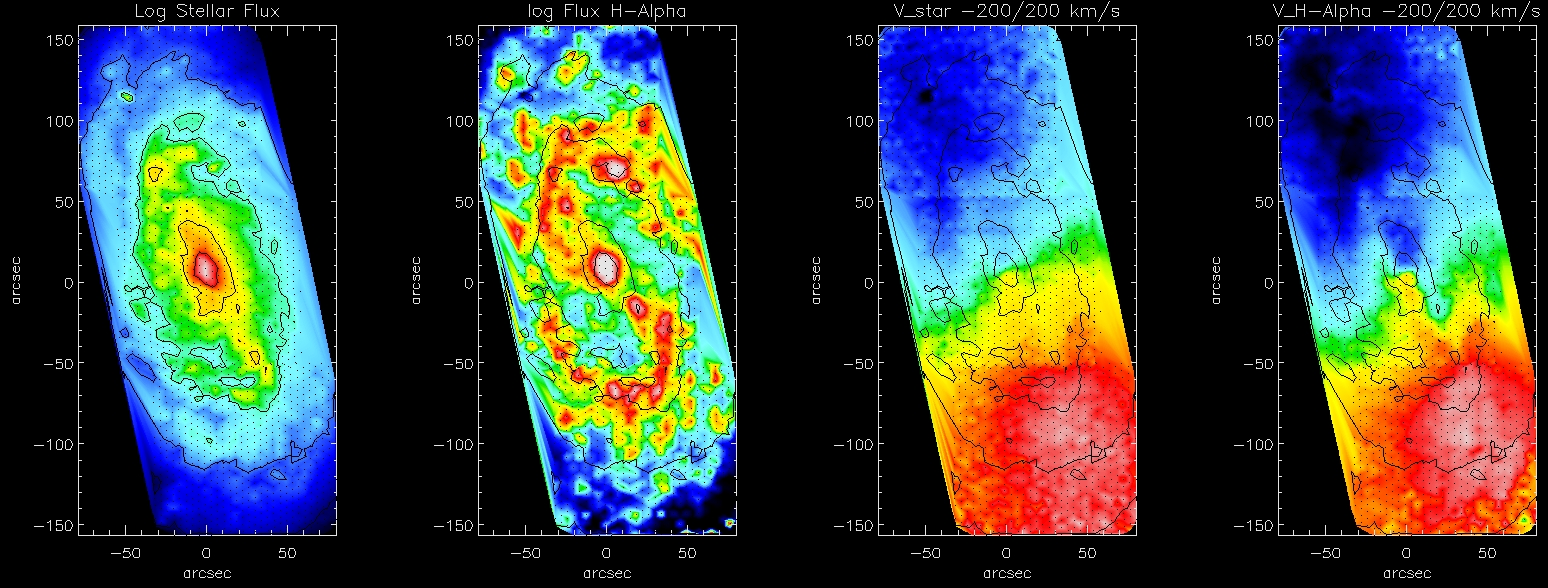

In [23]:
Image('https://users.obs.carnegiescience.edu/gblancm/venga_files/NGC2903_plots.jpg', width=900)

In [24]:
venga = '''NGC 337 ... ...
NGC 628 0.10a 1.35
NGC 1042 ... ...
NGC 1068 ... ...
NGC 2775 0.61b 4.85
NGC 2841 0.17c 2.97
NGC 2903 0.09c 0.42
NGC 3147 0.25a 3.66
NGC 3166 0.25b 0.56
NGC 3198 0.11a 5.12
NGC 3227 ... ...
NGC 3351 0.17c 1.51
NGC 3521 0.10a 3.20
NGC 3627 0.08c 2.90
NGC 3938 0.07b 1.18
NGC 3949 ... ...
NGC 4013 ... ...
NGC 4254 0.39b 2.68
NGC 4314 ... ...
NGC 4450 0.17b 2.26
NGC 4569 0.06c 1.90
NGC 4826 0.13c 3.94
NGC 5055 0.26a 1.84
NGC 5194 ... ...
NGC 5713 0.33b 1.84
NGC 5981 ... ...
NGC 6503 ... ...
NGC 6946 ... ...
NGC 7479 0.09b 1.09
NGC 7331 ... ...'''

In [25]:
venga = [''.join(l.split(' ')[0:2]) for l in venga.split('\n')]

In [26]:
venga

['NGC337',
 'NGC628',
 'NGC1042',
 'NGC1068',
 'NGC2775',
 'NGC2841',
 'NGC2903',
 'NGC3147',
 'NGC3166',
 'NGC3198',
 'NGC3227',
 'NGC3351',
 'NGC3521',
 'NGC3627',
 'NGC3938',
 'NGC3949',
 'NGC4013',
 'NGC4254',
 'NGC4314',
 'NGC4450',
 'NGC4569',
 'NGC4826',
 'NGC5055',
 'NGC5194',
 'NGC5713',
 'NGC5981',
 'NGC6503',
 'NGC6946',
 'NGC7479',
 'NGC7331']

In [27]:
ned_venga = []
for venganame in venga:
    result_table = Ned.query_object(venganame)
    ned_venga.append(result_table[0]['Object Name'])

ned_carma = []
for carmaname in carmaedge:
    result_table = Ned.query_object(carmaname)
    ned_carma.append(result_table[0]['Object Name'])
    
print set(ned_carma).intersection(ned_venga)

set([])


## CALIFA DR3

Calar Alto Legacy Integral Field spectroscopy Area survey http://www.caha.es/CALIFA/public_html/?q=content/list-objects-included-dr3&explorer=1

прямо на странице каталога есть NGC6125, выглядит интересно. Но у нее CO данные какие-то странные.

обработанные кубы (картинки) для ~300 галактик есть тут http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1609.06446

In [34]:
califa_card = {'Name' : 'CALIFA', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$SFR$' : '+'}
SurveyCard(califa_card)

Name,CALIFA
$\sigma_{s}$,+
$\Sigma_{s}$,+
$SFR$,+


In [35]:
califa = '''
IC5376	1	00:01:19	+34:31:31	X	X	X	NED IC5376
UGC00005	2	00:03:05	-01:54:49	X	X	X	NED UGC00005
NGC7819	3	00:04:24	+31:28:18	X	X	X	NED NGC7819
UGC00029	4	00:04:33	+28:18:05	 	X	 	NED UGC00029
IC1528	5	00:05:04	-07:05:35	X	X	X	NED IC1528
NGC7824	6	00:05:05	+06:55:12	X	 	 	NED NGC7824
UGC00036	7	00:05:13	+06:46:19	X	X	X	NED UGC00036
NGC0001	8	00:07:15	+27:42:28	X	X	X	NED NGC0001
NGC0023	9	00:09:52	+25:55:26	X	X	X	NED NGC0023
NGC0036	10	00:11:21	+06:23:21	X	X	X	NED NGC0036
UGC00139	11	00:14:31	-00:44:15	X	 	 	NED UGC00139
UGC00148	12	00:15:50	+16:05:23	X	X	X	NED UGC00148
MCG-02-02-030	13	00:30:06	-11:06:49	X	X	X	NED MCG-02-02-030
UGC00312	14	00:31:23	+08:28:00	X	X	X	NED UGC00312
ESO539-G014	15	00:31:27	-19:45:41	X	 	 	NED ESO539-G014
MCG-02-02-040	16	00:31:35	-10:30:23	X	 	 	NED MCG-02-02-040
UGC00335NED02	17	00:33:56	+07:16:06	X	X	X	NED UGC00335NED02
NGC0155	18	00:34:39	-10:45:59	X	X	X	NED NGC0155
ESO540-G003	19	00:35:39	-20:07:30	X	X	X	NED ESO540-G003
NGC0160	20	00:36:03	+23:57:28	X	X	X	NED NGC0160
NGC0165	21	00:36:28	-10:06:21	X	 	 	NED NGC0165
NGC0169	22	00:36:51	+23:59:27	X	X	X	NED NGC0169
NGC0171	23	00:37:21	-19:56:02	X	X	X	NED NGC0171
NGC0177	24	00:37:33	-22:32:56	 	X	 	NED NGC0177
NGC0180	25	00:37:57	+08:38:06	X	X	X	NED NGC0180
NGC0192	26	00:39:12	+00:51:50	X	X	X	NED NGC0192
NGC0216	27	00:41:26	-21:02:40	X	X	X	NED NGC0216
NGC0214	28	00:41:27	+25:29:57	X	X	X	NED NGC0214
NGC0217	29	00:41:33	-10:01:17	X	X	X	NED NGC0217
NGC0237	30	00:43:27	-00:07:29	X	X	X	NED NGC0237
NGC0234	31	00:43:31	+14:20:33	X	X	X	NED NGC0234
MCG-02-03-015	32	00:47:45	-09:50:06	 	X	 	NED MCG-02-03-015
NGC0257	33	00:48:01	+08:17:49	X	X	X	NED NGC0257
NGC0309	34	00:56:42	-09:54:50	X	X	X	NED NGC0309
NGC0364	35	01:04:40	-00:48:09	X	X	X	NED NGC0364
NGC0429	36	01:12:56	-00:20:41	X	X	X	NED NGC0429
IC1652	37	01:14:55	+31:56:56	X	X	X	NED IC1652
NGC0447	38	01:15:37	+33:04:05	X	X	X	NED NGC0447
NGC0444	39	01:15:49	+31:04:51	X	X	X	NED NGC0444
UGC00809	40	01:15:51	+33:48:39	X	X	X	NED UGC00809
UGC00841	41	01:19:09	+33:01:51	X	X	X	NED UGC00841
NGC0477	42	01:21:19	+40:29:18	X	X	X	NED NGC0477
IC1683	43	01:22:38	+34:26:15	X	X	X	NED IC1683
NGC0499	44	01:23:10	+33:27:37	X	X	X	NED NGC0499
NGC0496	45	01:23:11	+33:31:46	X	 	 	NED NGC0496
NGC0504	46	01:23:27	+33:12:17	X	X	X	NED NGC0504
NGC0517	47	01:24:43	+33:25:47	X	X	X	NED NGC0517
NGC0523	48	01:25:20	+34:01:31	X	X	 	NED NGC0523
UGC00987	49	01:25:30	+32:08:12	X	X	X	NED UGC00987
NGC0528	50	01:25:33	+33:40:18	X	X	X	NED NGC0528
NGC0529	51	01:25:39	+34:42:48	X	X	X	NED NGC0529
NGC0551	52	01:27:40	+37:11:00	X	X	X	NED NGC0551
UGC01057	53	01:28:52	+13:47:37	X	X	X	NED UGC01057
NGC0570	54	01:28:58	-00:56:56	X	X	X	NED NGC0570
UGC01062	55	01:28:59	-00:33:43	X	X	X	NED UGC01062
2MASXJ01331766+1319567	56	01:33:17	+13:19:55	X	 	 	NED 2MASXJ01331766+1319567
UGC01123	57	01:34:07	-01:01:56	X	X	X	NED UGC01123
IC0159	58	01:46:24	-08:38:12	X	 	 	NED IC0159
UGC01271	59	01:48:59	+13:12:39	X	X	X	NED UGC01271
UGCA021	60	01:49:09	-10:03:40	X	 	 	NED UGCA021
NGC0681	61	01:49:10	-10:25:35	X	X	X	NED NGC0681
UGC01274	62	01:49:11	+12:51:11	X	 	 	NED UGC01274
NGC0677	63	01:49:13	+13:03:19	X	X	 	NED NGC0677
NGC0693	64	01:50:30	+06:08:41	X	X	X	NED NGC0693
NGC0716	65	01:52:59	+12:42:30	X	X	X	NED NGC0716
UGC01368	66	01:54:12	+07:53:01	X	X	X	NED UGC01368
NGC0731	67	01:54:55	-09:00:38	X	X	X	NED NGC0731
NGC0741	68	01:56:20	+05:37:44	X	X	X	NED NGC0741
NGC0755	69	01:56:22	-09:03:40	X	X	X	NED NGC0755
IC1755	70	01:57:09	+14:32:59	X	X	X	NED IC1755
NGC0768	71	01:58:40	+00:31:45	X	X	X	NED NGC0768
NGC0774	72	01:59:34	+14:00:29	X	X	X	NED NGC0774
NGC0776	73	01:59:54	+23:38:39	X	X	X	NED NGC0776
NGC0781	74	02:00:08	+12:39:21	 	X	 	NED NGC0781
NGC0787	75	02:00:48	-09:00:09	X	 	 	NED NGC0787
NGC0810	76	02:05:28	+13:15:05	X	X	X	NED NGC0810
NGC0825	77	02:08:31	+06:19:25	X	X	X	NED NGC0825
NGC0833	78	02:09:20	-10:07:58	X	X	X	NED NGC0833
NGC0842	80	02:09:50	-07:45:44	X	X	X	NED NGC0842
UGC01659	81	02:09:56	+16:01:58	X	X	X	NED UGC01659
KUG0210-078	82	02:13:15	-07:39:42	 	X	 	NED KUG0210-078
UGC01749	83	02:16:13	+18:18:41	X	X	X	NED UGC01749
NGC0873	84	02:16:31	-11:20:53	X	X	X	NED NGC0873
NGC0924	85	02:26:46	+20:29:51	X	 	 	NED NGC0924
UGC01918	86	02:27:31	+25:40:08	X	X	X	NED UGC01918
NGC0932	87	02:27:54	+20:19:56	X	X	X	NED NGC0932
UGC01938	88	02:28:21	+23:12:53	X	X	X	NED UGC01938
NGC0941	89	02:28:27	-01:09:05	X	X	X	NED NGC0941
NGC0938	90	02:28:33	+20:17:01	X	X	X	NED NGC0938
NGC0955	91	02:30:32	-01:06:30	X	X	X	NED NGC0955
NGC0962	92	02:32:39	+28:04:13	X	X	X	NED NGC0962
UGC02018	93	02:32:39	+00:15:36	X	X	X	NED UGC02018
NGC0976	94	02:33:59	+20:58:36	X	X	X	NED NGC0976
NGC0991	95	02:35:32	-07:09:16	X	X	X	NED NGC0991
UGC02099	96	02:37:12	+21:34:03	X	X	X	NED UGC02099
UGC02134	97	02:38:51	+27:50:51	X	X	X	NED UGC02134
NGC1026	98	02:39:18	+06:32:38	X	X	X	NED NGC1026
NGC1041	99	02:40:24	-05:26:24	X	X	X	NED NGC1041
NGC1056	100	02:42:47	+28:34:28	X	X	X	NED NGC1056
NGC1060	101	02:43:14	+32:25:31	X	X	X	NED NGC1060
NGC1070	102	02:43:21	+04:58:05	X	X	X	NED NGC1070
UGC02222	103	02:45:09	+32:59:24	X	X	X	NED UGC02222
UGC02229	104	02:45:27	+00:54:51	X	X	X	NED UGC02229
UGC02239	105	02:46:35	+32:26:59	X	X	X	NED UGC02239
MCG-01-08-008	106	02:47:06	-02:58:20	 	X	 	NED MCG-01-08-008
NGC1094	107	02:47:27	-00:17:06	X	X	X	NED NGC1094
NGC1093	108	02:48:15	+34:25:12	X	 	 	NED NGC1093
UGC02311	109	02:49:27	-00:52:22	X	X	X	NED UGC02311
UGC02319	110	02:49:53	-01:00:13	X	X	X	NED UGC02319
MCG-02-08-014	111	02:52:22	-08:30:37	X	 	 	NED MCG-02-08-014
NGC1132	112	02:52:51	-01:16:27	X	 	 	NED NGC1132
UGC02367	113	02:53:40	+06:15:56	X	 	 	NED UGC02367
NGC1142	114	02:55:11	-00:11:00	X	X	X	NED NGC1142
UGC02403	115	02:55:56	+00:41:33	X	 	 	NED UGC02403
UGC02405	116	02:55:57	+06:29:41	X	 	 	NED UGC02405
UGC02443	117	02:58:21	-02:02:29	X	X	X	NED UGC02443
UGC02465	118	03:00:36	+35:10:10	X	 	 	NED UGC02465
NGC1167	119	03:01:41	+35:12:21	X	X	X	NED NGC1167
NGC1194	120	03:03:48	-01:06:13	 	X	 	NED NGC1194
NGC1211	121	03:06:51	-00:47:40	X	 	 	NED NGC1211
MCG-01-09-006	122	03:08:47	-07:02:26	X	X	X	NED MCG-01-09-006
IC0307	123	03:13:44	-00:14:29	X	X	X	NED IC0307
UGC02628	124	03:16:31	-00:28:05	X	X	X	NED UGC02628
UGC02690	125	03:20:42	-01:06:31	X	X	X	NED UGC02690
NGC1324	126	03:25:01	-05:44:44	X	X	X	NED NGC1324
NGC1349	127	03:31:27	+04:22:51	X	X	X	NED NGC1349
NGC1361	128	03:34:17	-06:15:54	X	X	X	NED NGC1361
MCG-01-10-015	129	03:38:38	-05:20:50	X	X	X	NED MCG-01-10-015
MCG-01-10-019	130	03:40:42	-06:24:54	X	X	X	NED MCG-01-10-019
NGC1542	131	04:17:13	+04:46:54	X	X	X	NED NGC1542
UGC03038	132	04:25:00	+07:10:15	X	 	 	NED UGC03038
UGC03107	133	04:37:21	+09:32:40	X	 	 	NED UGC03107
NGC1645	134	04:44:05	-05:27:56	X	X	X	NED NGC1645
UGC03151	135	04:45:19	+11:04:04	X	X	X	NED UGC03151
NGC1656	136	04:45:52	-05:08:11	X	X	X	NED NGC1656
NGC1659	137	04:46:29	-04:47:19	X	X	X	NED NGC1659
NGC1665	138	04:48:16	-05:25:38	X	X	X	NED NGC1665
NGC1666	139	04:48:32	-06:34:11	X	X	X	NED NGC1666
NGC1667	140	04:48:36	-06:19:11	X	X	X	NED NGC1667
IC2095	141	04:48:45	-05:07:28	X	X	X	NED IC2095
IC2098	142	04:50:43	-05:25:05	X	X	X	NED IC2098
NGC1677	143	04:50:51	-04:53:33	X	X	X	NED NGC1677
IC2101	144	04:51:41	-06:13:53	X	X	X	NED IC2101
ARP180	145	04:53:24	-04:47:32	X	 	 	NED ARP180
UGC03253	146	05:19:41	+84:03:10	X	X	 	NED UGC03253
NGC2253	147	06:43:41	+65:12:24	X	 	 	NED NGC2253
UGC03539	148	06:48:53	+66:15:43	X	 	 	NED UGC03539
NGC2347	149	07:16:03	+64:42:42	X	X	X	NED NGC2347
UGC03899	150	07:32:37	+35:36:52	X	X	 	NED UGC03899
NGC2410	151	07:35:01	+32:49:19	X	X	 	NED NGC2410
UGC03944	152	07:38:36	+37:38:00	X	X	X	NED UGC03944
UGC03969	153	07:41:13	+27:36:50	X	X	X	NED UGC03969
UGC03973	154	07:42:32	+49:48:34	X	 	 	NED UGC03973
UGC03995	155	07:44:08	+29:14:50	X	X	X	NED UGC03995
NGC2449	156	07:47:19	+26:55:48	X	X	X	NED NGC2449
UGC04029	157	07:48:18	+34:19:55	X	X	X	NED UGC04029
UGC04054	158	07:50:55	+23:53:45	X	X	 	NED UGC04054
IC0480	159	07:55:22	+26:44:27	X	X	X	NED IC0480
NGC2476	160	07:56:44	+39:55:40	X	 	 	NED NGC2476
NGC2480	161	07:57:09	+23:46:47	X	X	X	NED NGC2480
NGC2481	162	07:57:13	+23:46:04	X	X	X	NED NGC2481
NGC2486	163	07:57:55	+25:09:39	 	X	 	NED NGC2486
NGC2487	164	07:58:19	+25:08:57	X	X	X	NED NGC2487
UGC04132	165	07:59:12	+32:54:52	X	X	X	NED UGC04132
UGC04140	166	07:59:21	+18:06:37	X	X	X	NED UGC04140
UGC04145	167	07:59:39	+15:23:12	X	X	X	NED UGC04145
UGC04136	168	07:59:54	+47:24:47	X	X	X	NED UGC04136
IC0485	169	08:00:19	+26:42:05	X	X	X	NED IC0485
NGC2507	170	08:01:36	+15:42:35	X	X	X	NED NGC2507
NGC2513	171	08:02:24	+09:24:48	X	X	X	NED NGC2513
UGC04176	172	08:02:42	+40:40:42	X	X	X	NED UGC04176
UGC04190	173	08:02:57	+16:17:57	X	X	X	NED UGC04190
UGC04197	174	08:03:24	+10:03:01	X	X	X	NED UGC04197
UGC04210	175	08:05:04	+25:03:45	X	X	X	NED UGC04210
UGC04195	176	08:05:06	+66:46:59	X	 	 	NED UGC04195
NGC2522	177	08:06:12	+17:42:23	X	X	X	NED NGC2522
UGC04233	178	08:07:16	+08:52:08	X	 	 	NED UGC04233
NGC2530	179	08:07:55	+17:49:06	X	X	X	NED NGC2530
UGC04240	180	08:08:05	+14:50:15	X	X	 	NED UGC04240
UGC04245	181	08:08:45	+18:11:39	X	X	X	NED UGC04245
UGC04258	182	08:10:47	+46:54:44	X	X	X	NED UGC04258
NGC2540	183	08:12:46	+26:21:42	X	X	X	NED NGC2540
NGC2543	184	08:12:57	+36:15:16	X	 	 	NED NGC2543
UGC04280	185	08:14:32	+54:47:58	X	X	X	NED UGC04280
IC2247	186	08:15:58	+23:11:58	X	X	X	NED IC2247
UGC04308	187	08:17:25	+21:41:07	X	 	 	NED UGC04308
NGC2553	188	08:17:34	+20:54:11	X	X	X	NED NGC2553
NGC2554	189	08:17:53	+23:28:19	X	X	X	NED NGC2554
UGC04262	190	08:19:03	+83:15:59	X	X	 	NED UGC04262
NGC2558	191	08:19:12	+20:30:38	X	 	 	NED NGC2558
NGC2565	192	08:19:47	+22:01:53	X	X	 	NED NGC2565
NGC2572	194	08:21:24	+19:08:51	X	 	 	NED NGC2572
NGC2577	195	08:22:42	+22:33:11	X	X	X	NED NGC2577
UGC04375	196	08:23:10	+22:39:52	X	X	 	NED UGC04375
IC2341	197	08:23:41	+21:26:05	X	X	X	NED IC2341
IC2361	199	08:25:43	+27:52:28	X	 	 	NED IC2361
NGC2592	201	08:27:07	+25:58:13	X	X	X	NED NGC2592
NGC2596	203	08:27:26	+17:17:02	X	X	X	NED NGC2596
NGC2595	204	08:27:41	+21:28:44	X	X	X	NED NGC2595
UGC04425	205	08:28:13	+28:03:26	X	X	X	NED UGC04425
UGC04461	208	08:33:22	+52:31:56	X	 	 	NED UGC04461
NGC2604	209	08:33:22	+29:32:19	X	X	X	NED NGC2604
UGC04468	210	08:33:30	+41:31:31	X	X	X	NED UGC04468
NGC2623	213	08:38:23	+25:45:16	X	X	X	NED NGC2623
NGC2638	216	08:42:25	+37:13:15	X	X	X	NED NGC2638
UGC04548	217	08:43:06	+18:13:21	 	X	 	NED UGC04548
UGC04550	218	08:43:15	+13:05:09	X	X	 	NED UGC04550
NGC2639	219	08:43:37	+50:12:19	X	X	X	NED NGC2639
UGC04546	220	08:43:50	+51:59:28	X	 	 	NED UGC04546
UGC04551	221	08:44:05	+49:47:38	X	X	X	NED UGC04551
IC2407	225	08:48:08	+17:36:41	 	X	 	NED IC2407
UGC04659	226	08:54:40	+47:06:17	X	X	 	NED UGC04659
UGC04722	231	09:00:23	+25:36:42	X	X	X	NED UGC04722
NGC2730	232	09:02:15	+16:50:17	X	X	X	NED NGC2730
NGC2805	260	09:20:19	+64:06:10	X	X	X	NED NGC2805
NGC2880	272	09:29:34	+62:29:25	X	X	X	NED NGC2880
IC2487	273	09:30:08	+20:05:26	X	 	 	NED IC2487
IC0540	274	09:30:09	+07:54:10	X	X	X	NED IC0540
NGC2906	275	09:32:05	+08:26:30	X	X	X	NED NGC2906
NGC2916	277	09:34:57	+21:42:18	X	X	X	NED NGC2916
UGC05108	278	09:35:25	+29:48:45	X	X	X	NED UGC05108
NGC2918	279	09:35:43	+31:42:19	X	X	X	NED NGC2918
UGC05111	280	09:36:52	+66:47:17	X	X	X	NED UGC05111
UGC05113	281	09:36:56	+66:32:55	X	X	X	NED UGC05113
UGC05244	297	09:48:47	+64:10:01	X	X	X	NED UGC05244
UGC05358	306	09:58:46	+11:23:18	X	X	X	NED UGC05358
UGC05359	307	09:58:51	+19:12:53	X	X	X	NED UGC05359
UGC05396	309	10:01:40	+10:45:23	X	X	X	NED UGC05396
SDSSJ100141.02+371447.4	310	10:01:40	+37:14:52	X	X	 	NED SDSSJ100141.02+371447.4
NGC3106	311	10:04:04	+31:11:07	X	X	X	NED NGC3106
NGC3057	312	10:05:39	+80:17:12	X	X	X	NED NGC3057
UGC05498NED01	314	10:12:03	+23:05:07	X	X	 	NED UGC05498NED01
NGC3158	318	10:13:49	+38:45:53	X	X	X	NED NGC3158
NGC3160	319	10:13:54	+38:50:34	X	 	 	NED NGC3160
UGC05520	320	10:15:00	+65:08:23	X	 	 	NED UGC05520
NGC3182	323	10:19:32	+58:12:20	X	 	 	NED NGC3182
UGC05598	326	10:22:13	+20:35:21	X	X	X	NED UGC05598
NGC3300	339	10:36:37	+14:10:15	X	X	X	NED NGC3300
NGC3303	340	10:36:59	+18:08:09	X	X	X	NED NGC3303
UGC05771	341	10:37:18	+43:35:15	X	X	X	NED UGC05771
NGC3381	353	10:48:24	+34:42:41	X	X	X	NED NGC3381
NGC3395	355	10:49:49	+32:58:58	X	X	X	NED NGC3395
NGC3406NED01	360	10:51:43	+51:01:19	X	X	X	NED NGC3406NED01
UGC05990	361	10:52:37	+34:28:58	 	X	 	NED UGC05990
UGC06036	364	10:55:54	+36:51:41	X	X	X	NED UGC06036
IC0674	381	11:11:05	+43:37:58	X	X	X	NED IC0674
UGC06256	383	11:13:55	+65:10:38	X	X	X	NED UGC06256
UGC06312	386	11:17:59	+07:50:41	X	X	X	NED UGC06312
NGC3615	387	11:18:06	+23:23:50	X	X	X	NED NGC3615
NGC3614	388	11:18:20	+45:44:53	X	X	X	NED NGC3614
NGC3610	389	11:18:24	+58:47:10	X	 	 	NED NGC3610
NGC3619	391	11:19:21	+57:45:28	X	X	X	NED NGC3619
NGC3687	414	11:28:00	+29:30:39	X	X	X	NED NGC3687
NGC3811	436	11:41:16	+47:41:26	X	X	X	NED NGC3811
NGC3815	437	11:41:38	+24:48:01	X	X	X	NED NGC3815
NGC3991	475	11:57:31	+32:20:30	X	X	X	NED NGC3991
NGC3994	476	11:57:36	+32:16:39	X	X	X	NED NGC3994
NGC4003	479	11:57:58	+23:07:29	X	X	X	NED NGC4003
UGC07012	486	12:02:02	+29:50:52	X	 	 	NED UGC07012
NGC4047	489	12:02:50	+48:38:10	X	 	 	NED NGC4047
UGC07145	500	12:09:50	+38:13:07	X	X	X	NED UGC07145
NGC4149	502	12:10:32	+58:18:15	X	X	X	NED NGC4149
NGC4185	515	12:13:21	+28:30:39	X	X	X	NED NGC4185
NGC4210	518	12:15:15	+65:59:07	X	X	X	NED NGC4210
NGC4211NED02	520	12:15:36	+28:10:10	X	X	X	NED NGC4211NED02
IC0776	528	12:19:02	+08:51:22	X	X	X	NED IC0776
NGC4470	548	12:29:37	+07:49:27	X	 	 	NED NGC4470
IC3598	562	12:37:20	+28:12:29	X	X	X	NED IC3598
NGC4644	569	12:42:42	+55:08:43	X	X	X	NED NGC4644
NGC4676A	577	12:46:09	+30:43:55	X	X	X	NED NGC4676A
NGC4711	580	12:48:45	+35:19:57	X	X	X	NED NGC4711
UGC08004	581	12:51:37	+31:21:09	X	X	X	NED UGC08004
NGC4816	588	12:56:11	+27:44:43	X	X	X	NED NGC4816
NGC4841A	589	12:57:31	+28:28:36	X	X	X	NED NGC4841A
NGC4874	592	12:59:35	+27:57:33	X	 	 	NED NGC4874
UGC08107	593	12:59:39	+53:20:28	X	X	X	NED UGC08107
NGC4956	602	13:05:00	+35:10:41	X	X	X	NED NGC4956
NGC4961	603	13:05:47	+27:44:03	X	X	X	NED NGC4961
UGC08231	606	13:08:37	+54:04:27	X	X	X	NED UGC08231
UGC08234	607	13:08:46	+62:16:18	X	X	X	NED UGC08234
NGC5000	608	13:09:47	+28:54:25	X	X	X	NED NGC5000
UGC08250	609	13:10:19	+32:28:59	X	X	X	NED UGC08250
UGC08267	610	13:11:10	+43:43:35	X	X	X	NED UGC08267
NGC5016	611	13:12:06	+24:05:41	X	X	 	NED NGC5016
NGC5029	612	13:12:37	+47:03:47	X	X	X	NED NGC5029
UGC08322	613	13:15:00	+12:43:30	X	X	X	NED UGC08322
NGC5056	614	13:16:11	+30:57:01	 	X	 	NED NGC5056
IC4215	615	13:16:16	+25:24:18	X	 	 	NED IC4215
NGC5157	624	13:27:16	+32:01:50	X	X	X	NED NGC5157
NGC5205	630	13:30:03	+62:30:41	X	X	X	NED NGC5205
NGC5198	631	13:30:10	+46:40:14	X	 	 	NED NGC5198
NGC5216	633	13:32:06	+62:42:02	X	X	X	NED NGC5216
NGC5218	634	13:32:09	+62:46:04	X	X	 	NED NGC5218
NGC5267	651	13:40:39	+38:47:38	X	X	X	NED NGC5267
UGC08662	652	13:41:16	+33:46:21	X	X	X	NED UGC08662
NGC5289	653	13:45:08	+41:30:12	X	X	X	NED NGC5289
UGC08733	657	13:48:38	+43:24:43	X	X	X	NED UGC08733
NGC5320	659	13:50:19	+41:21:58	X	X	X	NED NGC5320
IC0944	663	13:51:30	+14:05:31	X	X	X	NED IC0944
UGC08778	664	13:52:06	+38:04:01	X	X	X	NED UGC08778
UGC08781	665	13:52:22	+21:32:21	X	X	X	NED UGC08781
NGC5376	672	13:55:15	+59:30:23	X	X	X	NED NGC5376
NGC5379	673	13:55:33	+59:44:34	X	X	X	NED NGC5379
NGC5378	676	13:56:50	+37:47:50	X	X	X	NED NGC5378
NGC5402	679	13:58:16	+59:48:51	X	X	X	NED NGC5402
NGC5394	680	13:58:33	+37:27:12	X	X	X	NED NGC5394
NGC5406	684	14:00:19	+38:54:55	X	X	X	NED NGC5406
NGC5425	685	14:00:47	+48:26:38	X	 	 	NED NGC5425
NGC5421NED02	686	14:01:41	+33:49:17	X	 	 	NED NGC5421NED02
NGC5439	688	14:01:57	+46:18:43	X	 	 	NED NGC5439
NGC5443	690	14:02:11	+55:48:50	X	 	 	NED NGC5443
NGC5423	695	14:02:48	+09:20:29	X	 	 	NED NGC5423
UGC08988	697	14:03:19	+60:59:24	X	X	X	NED UGC08988
NGC5434B	699	14:03:26	+09:28:01	X	 	 	NED NGC5434B
UGC08984	702	14:03:46	+35:44:29	X	 	 	NED UGC08984
NGC5473	703	14:04:42	+54:53:33	X	X	X	NED NGC5473
NGC5475	705	14:05:12	+55:44:30	X	X	X	NED NGC5475
NGC5480	707	14:06:21	+50:43:30	X	X	X	NED NGC5480
NGC5485	708	14:07:10	+55:00:06	X	X	X	NED NGC5485
UGC09071	711	14:10:02	+54:13:05	X	X	X	NED UGC09071
UGC09080	713	14:10:35	+59:21:28	X	X	X	NED UGC09080
UGC09067	714	14:10:44	+15:12:34	X	X	X	NED UGC09067
NGC5520	715	14:12:22	+50:20:54	X	X	X	NED NGC5520
NGC5513	716	14:13:08	+20:24:58	X	 	 	NED NGC5513
UGC09110	717	14:14:12	+15:37:20	X	 	 	NED UGC09110
UGC09113	718	14:14:14	+35:25:24	X	 	 	NED UGC09113
NGC5519	719	14:14:20	+07:30:57	X	 	 	NED NGC5519
NGC5522	720	14:14:49	+15:08:48	X	 	 	NED NGC5522
NGC5525	723	14:15:38	+14:16:57	X	 	 	NED NGC5525
NGC5533	724	14:16:07	+35:20:38	X	 	 	NED NGC5533
IC0995	725	14:16:30	+57:48:36	X	 	 	NED IC0995
NGC5532	726	14:16:52	+10:48:26	X	 	 	NED NGC5532
NGC5546	727	14:18:08	+07:33:52	X	 	 	NED NGC5546
IC0994	728	14:18:22	+11:11:42	X	 	 	NED IC0994
NGC5557	729	14:18:25	+36:29:36	X	 	 	NED NGC5557
NGC5549	730	14:18:38	+07:22:38	X	 	 	NED NGC5549
UGC09165	731	14:18:47	+24:56:25	X	 	 	NED UGC09165
NGC5559	732	14:19:12	+24:47:55	X	 	 	NED NGC5559
UGC09182	733	14:20:45	+21:56:08	X	 	 	NED UGC09182
NGC5580	734	14:21:37	+35:12:17	X	 	 	NED NGC5580
UGC09199	735	14:21:59	+11:06:00	X	 	 	NED UGC09199
NGC5587	736	14:22:10	+13:55:05	X	 	 	NED NGC5587
NGC5602	737	14:22:18	+50:30:05	X	 	 	NED NGC5602
NGC5598	738	14:22:27	+40:19:11	X	 	 	NED NGC5598
NGC5611	739	14:24:04	+33:02:50	X	 	 	NED NGC5611
NGC5614	740	14:24:07	+34:51:31	X	X	X	NED NGC5614
NGC5616	741	14:24:20	+36:27:41	X	 	 	NED NGC5616
NGC5610	742	14:24:22	+24:36:50	X	 	 	NED NGC5610
NGC5622	743	14:26:11	+48:33:50	X	 	 	NED NGC5622
NGC5631	744	14:26:32	+56:34:57	X	X	X	NED NGC5631
UGC09253	745	14:26:58	+31:31:01	X	 	 	NED UGC09253
NGC5623	746	14:27:08	+33:15:09	X	 	 	NED NGC5623
UGC09262	747	14:27:09	+35:55:14	X	 	 	NED UGC09262
NGC5633	748	14:27:27	+46:08:47	X	X	X	NED NGC5633
NGC5630	749	14:27:36	+41:15:28	X	X	X	NED NGC5630
NGC5635	750	14:28:31	+27:24:32	X	 	 	NED NGC5635
UGC09291	751	14:28:36	+38:59:56	X	 	 	NED UGC09291
NGC5642	752	14:29:12	+30:01:35	X	 	 	NED NGC5642
NGC5656	753	14:30:24	+35:19:15	X	 	 	NED NGC5656
NGC5657	754	14:30:43	+29:10:50	X	X	X	NED NGC5657
NGC5659	755	14:31:05	+25:21:18	X	 	 	NED NGC5659
NGC5665	756	14:32:25	+08:04:43	X	 	 	NED NGC5665
NGC5675	757	14:32:39	+36:18:07	X	 	 	NED NGC5675
NGC5682	758	14:34:44	+48:40:12	X	X	X	NED NGC5682
NGC5687	759	14:34:51	+54:28:33	X	 	 	NED NGC5687
NGC5689	760	14:35:29	+48:44:29	X	 	 	NED NGC5689
NGC5684	761	14:35:49	+36:32:35	X	 	 	NED NGC5684
UGC09401	762	14:36:08	+21:47:36	X	 	 	NED UGC09401
NGC5714	763	14:38:11	+46:38:17	X	 	 	NED NGC5714
NGC5720	764	14:38:32	+50:48:54	X	X	X	NED NGC5720
UGC09448	765	14:38:58	+51:07:14	X	 	 	NED UGC09448
NGC5730	766	14:39:51	+42:44:32	X	 	 	NED NGC5730
NGC5731	767	14:40:08	+42:46:46	X	 	 	NED NGC5731
NGC5732	768	14:40:38	+38:38:16	X	X	X	NED NGC5732
UGC09476	769	14:41:31	+44:30:46	X	X	X	NED UGC09476
NGC5739	770	14:42:28	+41:50:32	X	 	 	NED NGC5739
NGC5735	771	14:42:32	+28:43:35	X	 	 	NED NGC5735
UGC09492	772	14:44:11	+07:56:58	X	 	 	NED UGC09492
UGC09518	773	14:46:21	+32:46:48	X	 	 	NED UGC09518
UGC09537	774	14:48:26	+34:59:53	X	X	X	NED UGC09537
UGC09542	775	14:49:00	+42:27:50	X	X	X	NED UGC09542
UGC09539	776	14:49:05	+22:11:53	X	 	 	NED UGC09539
NGC5772	777	14:51:38	+40:35:56	X	 	 	NED NGC5772
NGC5784	778	14:54:16	+42:33:28	X	X	X	NED NGC5784
UGC09598	779	14:55:08	+43:49:06	X	X	X	NED UGC09598
NGC5797	780	14:56:23	+49:41:46	X	X	X	NED NGC5797
IC1079	781	14:56:35	+09:22:10	X	X	X	NED IC1079
UGC09629	782	14:57:10	+52:20:45	X	X	X	NED UGC09629
UGC09665	783	15:01:31	+48:19:11	X	X	X	NED UGC09665
NGC5829	784	15:02:41	+23:20:00	X	 	 	NED NGC5829
UGC09711	785	15:06:36	+09:26:18	X	 	 	NED UGC09711
IC4534	786	15:06:41	+23:38:30	X	 	 	NED IC4534
NGC5876	787	15:09:31	+54:30:23	X	X	X	NED NGC5876
UGC09759	788	15:10:40	+55:20:57	X	X	X	NED UGC09759
NGC5888	789	15:13:06	+41:15:52	X	X	X	NED NGC5888
UGC09777	790	15:14:14	+20:28:42	X	X	X	NED UGC09777
NGC5908	791	15:16:42	+55:24:33	X	X	X	NED NGC5908
UGC09842	792	15:25:05	+37:57:36	X	 	 	NED UGC09842
UGC09849	793	15:25:15	+53:24:25	 	X	 	NED UGC09849
NGC5928	794	15:26:02	+18:04:24	X	X	X	NED NGC5928
NGC5930	795	15:26:07	+41:40:33	X	X	X	NED NGC5930
NGC5934	796	15:28:12	+42:55:47	X	X	 	NED NGC5934
UGC09873	797	15:29:50	+42:37:44	X	X	X	NED UGC09873
UGC09892	798	15:32:51	+41:11:29	X	X	X	NED UGC09892
NGC5951	799	15:33:42	+15:00:26	X	X	X	NED NGC5951
UGC09901	800	15:34:26	+12:16:13	X	 	 	NED UGC09901
NGC5953	801	15:34:31	+15:11:37	X	X	X	NED NGC5953
ARP220	802	15:34:56	+23:30:12	X	X	X	NED ARP220
NGC5957	803	15:35:22	+12:02:51	X	X	X	NED NGC5957
NGC5971	804	15:35:36	+56:27:42	X	X	X	NED NGC5971
UGC09919	805	15:35:39	+12:36:23	X	X	X	NED UGC09919
NGC5966	806	15:35:51	+39:46:08	X	X	X	NED NGC5966
IC4566	807	15:36:41	+43:32:21	X	X	X	NED IC4566
UGC09937	808	15:37:22	+20:32:59	X	X	X	NED UGC09937
NGC5987	809	15:39:56	+58:04:46	X	X	X	NED NGC5987
NGC5980	810	15:41:30	+15:47:15	X	X	X	NED NGC5980
UGC10043	811	15:48:41	+21:52:11	X	X	X	NED UGC10043
UGC10042	812	15:48:56	+07:13:19	X	 	 	NED UGC10042
NGC6004	813	15:50:22	+18:56:21	X	X	X	NED NGC6004
UGC10097	814	15:55:42	+47:52:02	X	X	X	NED UGC10097
NGC6020	815	15:57:07	+22:24:16	X	X	X	NED NGC6020
NGC6021	816	15:57:30	+15:57:21	X	X	X	NED NGC6021
IC1151	817	15:58:31	+17:26:29	X	X	X	NED IC1151
UGC10123	818	15:59:02	+51:18:16	X	X	X	NED UGC10123
NGC6027	819	15:59:12	+20:45:47	X	X	X	NED NGC6027
NGC6032	820	16:03:00	+20:57:21	X	X	X	NED NGC6032
NGC6060	821	16:05:51	+21:29:05	X	X	X	NED NGC6060
UGC10205	822	16:06:39	+30:05:56	X	X	X	NED UGC10205
NGC6063	823	16:07:12	+07:58:44	X	X	X	NED NGC6063
IC1199	824	16:10:33	+10:02:25	X	X	X	NED IC1199
UGC10257	825	16:11:06	+38:15:04	X	X	 	NED UGC10257
NGC6081	826	16:12:56	+09:52:01	X	X	X	NED NGC6081
UGC10297	827	16:15:28	+18:54:18	X	X	X	NED UGC10297
UGC10331	828	16:17:20	+59:19:12	X	X	X	NED UGC10331
NGC6125	829	16:19:11	+57:59:02	X	X	X	NED NGC6125
UGC10337	830	16:19:28	+07:16:43	X	X	X	NED UGC10337
NGC6132	831	16:23:38	+11:47:10	X	X	X	NED NGC6132
NGC6146	832	16:25:09	+40:53:34	X	X	X	NED NGC6146
NGC6154	833	16:25:30	+49:50:25	X	X	X	NED NGC6154
UGC10380	834	16:25:49	+16:34:33	X	X	X	NED UGC10380
NGC6150	835	16:25:49	+40:29:19	X	X	X	NED NGC6150
NGC6155	836	16:26:07	+48:22:00	X	X	X	NED NGC6155
UGC10384	837	16:26:46	+11:34:49	X	X	X	NED UGC10384
UGC10388	838	16:27:02	+16:22:55	X	X	X	NED UGC10388
NGC6166NED01	839	16:28:38	+39:33:10	X	 	 	NED NGC6166NED01
NGC6173	840	16:29:44	+40:48:41	X	X	X	NED NGC6173
NGC6168	841	16:31:20	+20:11:05	X	X	X	NED NGC6168
NGC6186	842	16:34:24	+21:32:27	X	X	X	NED NGC6186
UGC10650	843	17:00:14	+23:06:25	X	X	 	NED UGC10650
NGC6278	844	17:00:49	+23:00:39	X	X	X	NED NGC6278
UGC10693	845	17:04:52	+41:51:55	X	X	X	NED UGC10693
UGC10695	846	17:05:05	+43:02:35	X	X	X	NED UGC10695
UGC10710	847	17:06:52	+43:07:19	X	X	X	NED UGC10710
NGC6310	848	17:07:56	+60:59:24	X	X	X	NED NGC6310
NGC6301	849	17:08:32	+42:20:20	X	X	X	NED NGC6301
NGC6314	850	17:12:38	+23:16:11	X	X	X	NED NGC6314
NGC6338	851	17:15:22	+57:24:40	X	X	 	NED NGC6338
UGC10796	852	17:16:47	+61:55:12	X	X	X	NED UGC10796
NGC6361	853	17:18:40	+60:36:29	X	 	 	NED NGC6361
UGC10811	854	17:18:43	+58:08:06	X	X	X	NED UGC10811
UGC10799	855	17:18:53	+29:51:21	X	X	X	NED UGC10799
IC1256	856	17:23:46	+26:29:11	X	X	X	NED IC1256
NGC6394	857	17:30:20	+59:38:23	X	X	X	NED NGC6394
UGC10905	858	17:34:06	+25:20:37	X	X	X	NED UGC10905
NGC6411	859	17:35:32	+60:48:48	X	X	X	NED NGC6411
NGC6427	860	17:43:38	+25:29:37	X	X	X	NED NGC6427
UGC10972	861	17:46:21	+26:32:37	X	X	X	NED UGC10972
NGC6478	862	17:48:37	+51:09:26	X	X	X	NED NGC6478
NGC6497	863	17:51:17	+59:28:14	X	X	X	NED NGC6497
NGC6515	864	17:57:24	+50:43:41	X	X	X	NED NGC6515
UGC11228	865	18:24:45	+41:29:34	X	X	X	NED UGC11228
UGC11262	866	18:30:35	+42:41:34	X	X	X	NED UGC11262
NGC6762	867	19:05:36	+63:56:03	X	X	X	NED NGC6762
MCG-02-51-004	868	20:15:39	-13:37:19	X	X	X	NED MCG-02-51-004
NGC6941	869	20:36:23	-04:37:07	X	X	X	NED NGC6941
NGC6945	870	20:39:00	-04:58:21	X	X	X	NED NGC6945
NGC6978	871	20:52:35	-05:42:40	X	 	 	NED NGC6978
UGC11649	872	20:55:27	-01:13:30	X	X	X	NED UGC11649
UGC11680NED01	873	21:07:40	+03:52:17	X	 	 	NED UGC11680NED01
NGC7025	874	21:07:46	+16:20:09	X	X	X	NED NGC7025
UGC11694	875	21:11:51	+11:16:33	X	X	X	NED UGC11694
NGC7047	876	21:16:27	-00:49:35	X	X	X	NED NGC7047
UGC11717	877	21:18:35	+19:43:08	X	X	X	NED UGC11717
MCG-01-54-016	878	21:25:59	-03:48:32	X	X	X	NED MCG-01-54-016
UGC11740	879	21:26:13	+09:47:52	X	X	 	NED UGC11740
UGC11792	880	21:42:12	+05:36:55	X	X	X	NED UGC11792
NGC7194	881	22:03:30	+12:38:12	X	X	X	NED NGC7194
NGC7236	882	22:14:44	+13:50:47	X	 	 	NED NGC7236
UGC11958	883	22:14:46	+13:50:27	X	X	X	NED UGC11958
UGC11982	884	22:18:52	-01:03:31	X	X	X	NED UGC11982
UGC12054	885	22:29:31	+07:43:34	X	X	X	NED UGC12054
NGC7311	886	22:34:06	+05:34:13	X	X	X	NED NGC7311
NGC7321	887	22:36:27	+21:37:18	X	X	X	NED NGC7321
UGC12127	888	22:38:29	+35:19:47	X	X	 	NED UGC12127
NGC7364	889	22:44:24	-00:09:43	X	X	X	NED NGC7364
UGC12185	890	22:47:24	+31:22:25	X	X	X	NED UGC12185
UGC12224	891	22:52:37	+06:05:37	X	X	X	NED UGC12224
VV488NED02	892	22:56:50	-08:58:02	X	X	X	NED VV488NED02
NGC7436B	893	22:57:57	+26:09:00	X	X	X	NED NGC7436B
UGC12274	894	22:58:19	+26:03:43	X	X	X	NED UGC12274
UGC12308	895	23:01:18	+14:20:22	X	X	 	NED UGC12308
NGC7466	896	23:02:02	+27:03:09	X	X	X	NED NGC7466
UGC12348	897	23:05:18	+00:11:22	X	X	X	NED UGC12348
NGC7489	898	23:07:32	+22:59:53	X	X	X	NED NGC7489
NGC7536	899	23:14:12	+13:25:35	X	 	 	NED NGC7536
NGC7550	900	23:15:15	+18:57:41	X	 	 	NED NGC7550
NGC7549	901	23:15:16	+19:02:30	X	X	X	NED NGC7549
NGC7563	902	23:15:55	+13:11:45	X	X	X	NED NGC7563
NGC7562	903	23:15:57	+06:41:15	X	X	X	NED NGC7562
NGC7591	904	23:18:15	+06:35:09	X	X	X	NED NGC7591
UGC12494	905	23:18:52	+06:52:36	X	X	X	NED UGC12494
IC5309	906	23:19:11	+08:06:34	X	X	X	NED IC5309
NGC7608	907	23:19:14	+08:21:00	X	X	X	NED NGC7608
NGC7611	908	23:19:36	+08:03:47	X	 	 	NED NGC7611
UGC12519	909	23:20:02	+15:57:10	X	X	X	NED UGC12519
UGC12518	910	23:20:12	+07:55:55	X	X	X	NED UGC12518
NGC7619	911	23:20:14	+08:12:22	X	X	X	NED NGC7619
NGC7623	912	23:20:29	+08:23:44	X	X	X	NED NGC7623
NGC7625	913	23:20:29	+17:13:32	X	X	X	NED NGC7625
NGC7631	914	23:21:26	+08:13:03	X	X	X	NED NGC7631
NGC7653	915	23:24:48	+15:16:32	X	X	X	NED NGC7653
NGC7671	916	23:27:18	+12:28:03	X	X	X	NED NGC7671
NGC7683	917	23:29:03	+11:26:43	X	X	X	NED NGC7683
UGC12633	918	23:30:13	+15:45:39	X	X	X	NED UGC12633
NGC7684	919	23:30:31	+00:04:51	X	X	X	NED NGC7684
NGC7691	920	23:32:24	+15:50:52	X	X	 	NED NGC7691
UGC12653	921	23:32:29	+14:49:00	X	 	 	NED UGC12653
UGC12688	922	23:35:25	+07:19:19	X	X	X	NED UGC12688
NGC7711	923	23:35:38	+15:18:07	X	X	X	NED NGC7711
NGC7716	924	23:36:30	+00:17:50	X	X	X	NED NGC7716
NGC7722	925	23:38:40	+15:57:16	X	X	X	NED NGC7722
UGC12723	926	23:39:23	+10:51:00	X	X	X	NED UGC12723
NGC7738	927	23:44:01	+00:30:59	X	X	X	NED NGC7738
UGC12810	929	23:51:05	+01:03:24	X	X	X	NED UGC12810
UGC12816	930	23:51:50	+03:04:58	X	X	X	NED UGC12816
NGC7782	931	23:53:53	+07:58:14	X	 	 	NED NGC7782
NGC7783NED01	932	23:54:09	+00:22:58	X	X	X	NED NGC7783NED01
NGC7787	933	23:56:07	+00:32:58	X	X	X	NED NGC7787
UGC12857	934	23:56:47	+01:21:19	X	X	X	NED UGC12857
UGC12864	935	23:57:23	+30:59:30	X	X	X	NED UGC12864
MCG-01-01-012	936	23:59:10	-04:11:29	X	X	X	NED MCG-01-01-012
NGC7800	937	23:59:36	+14:48:25	X	X	X	NED NGC7800
NGC0014	1000	00:08:45	+15:48:56	X	X	 	NED NGC0014
MCG-02-06-016	1002	02:00:54	-08:50:27	X	 	 	NED MCG-02-06-016
BKD2008WR346	1003	02:26:27	+01:09:38	X	 	 	NED BKD2008WR346
UGC04455	1005	08:31:32	-01:11:52	X	X	 	NED UGC04455
Mrk1418	1007	09:40:26	+48:20:15	X	X	X	NED Mrk1418
UGC05187	1009	09:43:05	+41:05:34	X	X	X	NED UGC05187
UGC05326	1010	09:55:24	+33:15:46	X	X	X	NED UGC05326
UGC05377	1011	10:00:31	+03:12:18	X	X	 	NED UGC05377
NGC3353	1013	10:45:21	+55:57:37	X	X	X	NED NGC3353
IC2604	1015	10:49:24	+32:46:21	X	X	X	NED IC2604
UGC05976	1016	10:52:02	+55:36:04	X	X	X	NED UGC05976
UGC06035	1017	10:55:27	+17:08:36	X	 	 	NED UGC06035
UGC06181	1018	11:07:45	+19:33:00	 	X	 	NED UGC06181
UGC06249	1020	11:13:20	+59:54:29	 	X	 	NED UGC06249
NGC3600	1022	11:15:51	+41:35:27	X	X	X	NED NGC3600
UGC06320	1024	11:18:16	+18:50:49	X	X	X	NED UGC06320
SN2002ji	1025	11:22:54	+16:35:23	X	 	 	NED SN2002ji
MCG+10-17-007	1027	11:30:16	+58:08:02	X	 	 	NED MCG+10-17-007
NGC3773	1028	11:38:12	+12:06:44	X	 	 	NED NGC3773
UGC06616	1030	11:39:20	+58:16:06	X	 	 	NED UGC06616
NGC3913	1032	11:50:38	+55:21:14	X	 	 	NED NGC3913
UGC6930	1034	11:57:16	+49:17:00	X	 	 	NED UGC6930
NGC3990	1035	11:57:35	+55:27:31	X	 	 	NED NGC3990
UGC07129	1039	12:08:54	+41:44:26	X	 	 	NED UGC07129
IC3065	1041	12:15:12	+14:25:58	X	 	 	NED IC3065
IC3586	1065	12:36:54	+12:31:12	X	 	 	NED IC3586
IC3652	1066	12:40:58	+11:11:04	X	 	 	NED IC3652
NGC4630	1067	12:42:30	+03:57:37	X	 	 	NED NGC4630
MCG-01-33-007	1069	12:47:37	-05:52:02	X	 	 	NED MCG-01-33-007
UGC8688	1075	13:43:30	+43:27:44	X	X	X	NED UGC8688
UGC8909	1076	13:58:37	+60:47:48	X	X	X	NED UGC8909
UGC9562	1079	14:51:13	+35:32:32	X	X	X	NED UGC9562
UGC9663	1080	15:01:13	+52:35:47	X	X	X	NED UGC9663
UGC9661	1081	15:02:03	+01:50:28	 	X	 	NED UGC9661
UGC00312NED01	2014	00:31:18	+08:28:30	X	X	X	NED UGC00312NED01
UGC355NED01	2017	00:33:54	+07:16:44	 	X	 	NED UGC355NED01
NGC0495	2044	01:22:55	+33:28:18	X	X	 	NED NGC0495
CGCG536-030	2052	01:21:08	+40:28:14	X	X	X	NED CGCG536-030
NGC0675	2063	01:49:08	+13:03:35	X	X	 	NED NGC0675
IC0208	2077	02:08:27	+06:23:42	X	 	 	NED IC0208
NGC0835	2078	02:09:24	-10:08:09	X	 	 	NED NGC0835
KUG1349+143	2663	13:51:32	+14:06:39	X	X	X	NED KUG1349+143
NGC5481	2707	14:06:40	+50:43:23	X	X	X	NED NGC5481
CGCG163-062	2752	14:29:11	+30:04:38	X	X	X	NED CGCG163-062
NGC5794	2780	14:55:53	+49:43:33	X	X	X	NED NGC5794
IC1078	2781	14:56:28	+09:21:16	X	X	X	NED IC1078
UGC09708	2785	15:06:31	+09:26:58	X	 	 	NED UGC09708
NGC5929	2795	15:26:05	+41:40:14	X	X	X	NED NGC5929
NGC5935	2796	15:28:16	+42:56:38	X	 	 	NED NGC5935
NGC5954	2801	15:34:34	+15:12:00	X	X	X	NED NGC5954
NGC6150B	2835	16:25:43	+40:28:31	X	X	X	NED NGC6150B
VIIZw700	2851	17:15:22	+57:25:58	X	X	X	NED VIIZw700
NGC6977	2871	20:52:29	-05:44:45	X	X	X	NED NGC6977
UGC11680NED02	2873	21:07:45	+03:52:40	X	X	X	NED UGC11680NED02
NGC7559B	2902	23:15:46	+13:17:24	X	X	X	NED NGC7559B
NGC0507	2940	01:23:39	+33:15:23	X	 	 	NED NGC0507
NGC0508	2941	01:23:39	+33:16:51	X	 	 	NED NGC0508
NGC0515	2942	01:24:37	+33:28:23	X	 	 	NED NGC0515
ARP118	2943	02:55:10	-00:10:48	X	 	 	NED ARP118
NGC6023	2944	15:57:49	+16:18:36	X	 	 	NED NGC6023
NGC6090	2945	16:11:40	+52:27:27	X	X	X	NED NGC6090
UGC12494NOTES01	2998	23:18:51	+06:53:44	X	 	 	NED UGC12494NOTES01
NGC4676B	2999	12:46:10	+30:43:22	X	X	X	NED NGC4676B
MCG-02-02-086	3001	00:41:50	-09:18:11	X	 	 	NED MCG-02-02-086
IC1602	3003	00:55:51	-09:59:08	X	 	 	NED IC1602
NGC0548	3004	01:26:02	-01:13:32	X	X	X	NED NGC0548
NGC0647	3005	01:39:55	-09:14:32	X	 	 	NED NGC0647
SDSSJ015424	3006	01:54:23	+13:32:27	X	X	X	NED SDSSJ015424
IC0195	3007	02:03:44	+14:42:33	 	X	 	NED IC0195
UGC03960	3008	07:40:22	+23:16:29	X	X	X	NED UGC03960
LSBCF560-04	3009	07:46:18	+18:22:07	X	 	 	NED LSBCF560-04
MCG+07-17-002	3010	07:55:43	+41:12:14	X	 	 	NED MCG+07-17-002
NGC2484	3011	07:58:27	+37:47:12	X	 	 	NED NGC2484
UGC04241	3012	08:09:23	+57:45:47	X	 	 	NED UGC04241
UGC4256	3013	08:10:14	+33:57:24	 	X	 	NED UGC4256
IC2378	3015	08:28:31	+30:25:53	X	 	 	NED IC2378
UGC4458	3016	08:32:10	+22:33:38	 	X	 	NED UGC4458
IC2402	3017	08:47:58	+31:47:08	X	 	 	NED IC2402
NGC2691	3018	08:54:45	+39:32:19	X	X	X	NED NGC2691
UGC04730	3019	09:01:57	+60:09:06	X	X	X	NED UGC04730
2MASXJ09065870	3020	09:06:58	+20:47:11	X	 	 	NED 2MASXJ09065870
NGC2780	3021	09:12:43	+34:55:32	X	X	X	NED NGC2780
NGC3220	3022	10:23:44	+57:01:36	X	X	X	NED NGC3220
MCG+09-18-064	3023	10:59:45	+53:48:12	X	 	 	NED MCG+09-18-064
UGC06517	3025	11:32:01	+36:41:52	X	X	 	NED UGC06517
CGCG242-073	3026	11:40:46	+46:32:25	X	 	 	NED CGCG242-073
NGC3896	3027	11:48:55	+48:40:29	X	X	X	NED NGC3896
IC3631	3028	12:39:47	+12:58:26	X	X	X	NED IC3631
NGC5145	3029	13:25:13	+43:16:02	X	 	 	NED NGC5145
NGC5358	3030	13:54:00	+40:16:38	X	X	 	NED NGC5358
UGC09056	3031	14:09:20	+49:02:22	X	 	 	NED UGC09056
UGC09356	3032	14:32:53	+11:35:42	X	 	 	NED UGC09356
UGC09868	3033	15:29:14	+52:51:50	X	 	 	NED UGC09868
NGC5950	3034	15:31:30	+40:25:47	X	X	X	NED NGC5950
UGC10117	3035	15:59:23	+21:36:12	X	X	 	NED UGC10117
CGCG251-041	3037	16:43:08	+45:50:44	X	X	 	NED CGCG251-041
UGC10803	3038	17:16:04	+73:26:10	X	X	X	NED UGC10803
MCG-01-52-012	3039	20:37:49	-06:05:27	X	X	 	NED MCG-01-52-012
CGCG429-012	3040	22:36:49	+14:23:12	X	X	 	NED CGCG429-012
UGC9837	4027	15:23:51	+58:03:10	X	X	X	NED UGC9837
UGC12250	4031	22:55:35	+12:47:25	X	X	X	NED UGC12250
NGC5947	4034	15:30:36	+42:43:01	X	X	X	NED NGC5947
NGC1590	5006	04:31:09	+07:37:51	X	 	 	NED NGC1590
UGC03552	5007	06:49:50	+28:22:15	X	 	 	NED UGC03552
NGC2526	5009	08:06:58	+08:00:14	X	 	 	NED NGC2526
IC2481	5017	09:27:28	+03:55:46	X	 	 	NED IC2481
UGC5392	5021	10:01:35	+21:36:27	X	 	 	NED UGC5392
MCG+08-19-17	5024	10:18:57	+46:27:15	X	 	 	NED MCG+08-19-17
NGC3323	5025	10:39:38	+25:19:22	X	 	 	NED NGC3323
IC701	5031	11:31:00	+20:28:08	X	 	 	NED IC701
PGC0213858	5033	11:34:36	+54:53:28	X	 	 	NED PGC0213858
PGC0035860	5034	11:35:50	+34:16:55	X	 	 	NED PGC0035860
NGC4384	5039	12:25:11	+54:30:22	X	 	 	NED NGC4384
IC3918	5042	12:56:53	+22:22:24	X	 	 	NED IC3918
MCG+09-22-53	5047	13:22:31	+54:49:05	X	 	 	NED MCG+09-22-53
NGC6373	5063	17:24:07	+58:59:42	X	 	 	NED NGC6373
CGCG263-044	7001	08:32:42	+52:26:32	 	X	 	NED CGCG263-044
NGC0426	8000	01:12:48	-00:17:24	X	 	 	NED NGC0426
NGC0472	9000	01:20:28	+32:42:32	X	 	 	NED NGC0472
NGC1270	9001	03:18:57	+41:28:11	X	 	 	NED NGC1270
NGC1271	9002	03:19:10	+41:21:11	X	 	 	NED NGC1271
NGC1281	9004	03:20:05	+41:37:48	X	 	 	NED NGC1281
NGC2767	9005	09:10:11	+50:24:04	X	 	 	NED NGC2767
PGC11179	9007	02:57:33	+05:58:36	X	 	 	NED PGC11179
PGC32873	9009	10:56:15	+42:19:59	X	 	 	NED PGC32873  
'''

In [36]:
califa = [l.split('\t')[0] for l in califa.split('\n')][1:-1]

In [37]:
len(califa)

667

In [38]:
%%time
califa_set = []
for c in califa:
    try:
        result_table = Ned.query_object(c)
        califa_set.append(result_table[0]['Object Name'])
    except Exception:
        print c

BKD2008WR346
UGC00312NED01
UGC355NED01
SDSSJ015424
2MASXJ09065870
PGC0213858
PGC0035860
Wall time: 12.6 s


Проверка:

In [63]:
intersect = set(califa_set).intersection(carma_set)

In [64]:
len(intersect), len(carma_set)

(126, 126)

Это правильно, поскольку в CARMA EDGE используются данные CALIFA

In [65]:
intersect = set(califa_set).intersection(thing_set)

In [66]:
intersect

set()

## MaNGA

непонятно пока, как извлекать данные

## SAURON

## DiskMass

The DiskMass Survey: VI. Gas and stellar kinematics in spiral galaxies from PPak integral-field spectroscopy https://ui.adsabs.harvard.edu/#abs/2013A&A...557A.130M/abstract 30 galaxies

TODO: почему-то в сравнительной табличке в заметках указано 46 штук.

In [54]:
diskmass_card = {'Name' : 'DiskMass', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+'}
SurveyCard(diskmass_card)

Name,DiskMass
$\sigma_{s}$,+
$\Sigma_{s}$,+


In [55]:
diskmass = ['448', '463', '1081' , '1087' , '1529' , '1635' , '1862' , '1908' , '3091' , '3140' , '3701' , '3997' , '4036' , 
              '4107' , '4256' , '4368' , '4380' , '4458' , '4555' , '4622' , '6903' , '6918' , '7244' , '7917' , '8196' , '9177' , '9837' , '9965' , '11318', '12391']

In [56]:
diskmass = ['UGC' + d for d in diskmass]

In [57]:
len(diskmass)

30

# ETG

## ATLAS3D

http://www-astro.physics.ox.ac.uk/atlas3d/ (похоже там ранние S0 И E типы галактик, и есть большая и малая выборки)

In [12]:
atlas3d_card = {'Name' : 'ATLAS3D', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$\Sigma_{\rm{H_2}}$' : '+', r'$\Sigma_{\rm{HI}}$' : '+', '$SFR$' : '?'}
SurveyCard(atlas3d_card)

Name,ATLAS3D
$\sigma_{s}$,+
$\Sigma_{s}$,+
$\Sigma_{\rm{H_2}}$,+
$\Sigma_{\rm{HI}}$,+
$SFR$,?


In [13]:
atlas3d = ['IC0560',  
     'IC0598',  
     'IC0676',  
     'IC0719',  
     'IC0782',  
     'IC1024',  
     'IC3631',  
    'NGC0448',  
    'NGC0474',  
    'NGC0502',  
    'NGC0509',  
    'NGC0516',  
    'NGC0524',  
    'NGC0525',  
    'NGC0661',  
    'NGC0680',  
    'NGC0770',  
    'NGC0821',  
    'NGC0936',  
    'NGC1023',  
    'NGC1121',  
    'NGC1222',  
    'NGC1248',  
    'NGC1266',  
    'NGC1289',  
    'NGC1665',  
    'NGC2481',  
    'NGC2549',  
    'NGC2577',  
    'NGC2592',  
    'NGC2594',  
    'NGC2679',  
    'NGC2685',  
    'NGC2695',  
    'NGC2698',  
    'NGC2699',  
    'NGC2764',  
    'NGC2768',  
    'NGC2778',  
    'NGC2824',  
    'NGC2852',  
    'NGC2859',  
    'NGC2880',  
    'NGC2950',  
    'NGC2962',  
    'NGC2974',  
    'NGC3032',  
    'NGC3073',  
    'NGC3098',  
    'NGC3156',  
    'NGC3182',  
    'NGC3193',  
    'NGC3226',  
    'NGC3230',  
    'NGC3245',  
    'NGC3248',  
    'NGC3301',  
    'NGC3377',  
    'NGC3379',  
    'NGC3384',  
    'NGC3400',  
    'NGC3412',  
    'NGC3414',  
    'NGC3457',  
    'NGC3458',  
    'NGC3489',  
    'NGC3499',  
    'NGC3522',  
    'NGC3530',  
    'NGC3595',  
    'NGC3599',  
    'NGC3605',  
    'NGC3607',  
    'NGC3608',  
    'NGC3610',  
    'NGC3613',  
    'NGC3619',  
    'NGC3626',  
    'NGC3630',  
    'NGC3640',  
    'NGC3641',  
    'NGC3648',  
    'NGC3658',  
    'NGC3665',  
    'NGC3674',  
    'NGC3694',  
    'NGC3757',  
    'NGC3796',  
    'NGC3838',  
    'NGC3941',  
    'NGC3945',  
    'NGC3998',  
    'NGC4026',  
    'NGC4036',  
    'NGC4078',  
    'NGC4111',  
    'NGC4119',  
    'NGC4143',  
    'NGC4150',  
    'NGC4168',  
    'NGC4179',  
    'NGC4191',  
    'NGC4203',  
    'NGC4215',  
    'NGC4233',  
    'NGC4249',  
    'NGC4251',  
    'NGC4255',  
    'NGC4259',  
    'NGC4261',  
    'NGC4262',  
    'NGC4264',  
    'NGC4267',  
    'NGC4268',  
    'NGC4270',  
    'NGC4278',  
    'NGC4281',  
    'NGC4283',  
    'NGC4324',  
    'NGC4339',  
    'NGC4340',  
    'NGC4342',  
    'NGC4346',  
    'NGC4350',  
    'NGC4365',  
    'NGC4371',  
    'NGC4374',  
    'NGC4377',  
    'NGC4379',  
    'NGC4382',  
    'NGC4387',  
    'NGC4406',  
    'NGC4417',  
    'NGC4425',  
    'NGC4429',  
    'NGC4434',  
    'NGC4435',  
    'NGC4442',  
    'NGC4452',  
    'NGC4458',  
    'NGC4459',  
    'NGC4461',  
    'NGC4472',  
    'NGC4473',  
    'NGC4474',  
    'NGC4476',  
    'NGC4477',  
    'NGC4478',  
    'NGC4483',  
    'NGC4486',  
    'NGC4486A',  
    'NGC4489',  
    'NGC4494',  
    'NGC4503',  
    'NGC4521',  
    'NGC4526',  
    'NGC4528',  
    'NGC4546',  
    'NGC4550',  
    'NGC4551',  
    'NGC4552',  
    'NGC4564',  
    'NGC4570',  
    'NGC4578',  
    'NGC4596',  
    'NGC4608',  
    'NGC4612',  
    'NGC4621',  
    'NGC4623',  
    'NGC4624',  
    'NGC4636',  
    'NGC4638',  
    'NGC4643',  
    'NGC4649',  
    'NGC4660',  
    'NGC4684',  
    'NGC4690',  
    'NGC4694',  
    'NGC4697',  
    'NGC4710',  
    'NGC4733',  
    'NGC4753',  
    'NGC4754',  
    'NGC4762',  
    'NGC4803',  
    'NGC5103',  
    'NGC5173',  
    'NGC5198',  
    'NGC5273',  
    'NGC5308',  
    'NGC5322',  
    'NGC5342',  
    'NGC5353',  
    'NGC5355',  
    'NGC5358',  
    'NGC5379',  
    'NGC5422',  
    'NGC5473',  
    'NGC5475',  
    'NGC5481',  
    'NGC5485',  
    'NGC5493',  
    'NGC5500',  
    'NGC5507',  
    'NGC5557',  
    'NGC5574',  
    'NGC5576',  
    'NGC5582',  
    'NGC5611',  
    'NGC5631',  
    'NGC5638',  
    'NGC5687',  
    'NGC5770',  
    'NGC5813',  
    'NGC5831',  
    'NGC5838',  
    'NGC5839',  
    'NGC5845',  
    'NGC5846',  
    'NGC5854',  
    'NGC5864',  
    'NGC5866',  
    'NGC5869',  
    'NGC6010',  
    'NGC6014',  
    'NGC6017',  
    'NGC6149',  
    'NGC6278',  
    'NGC6547',  
    'NGC6548',  
    'NGC6703',  
    'NGC6798',  
    'NGC7280',  
    'NGC7332',  
    'NGC7454',  
    'NGC7457',  
    'NGC7465',  
    'NGC7693',  
    'NGC7710',  
  'PGC016060',  
  'PGC028887',  
  'PGC029321',  
  'PGC035754',  
  'PGC042549',  
  'PGC044433',  
  'PGC050395',  
  'PGC051753',  
  'PGC054452',  
  'PGC056772',  
  'PGC058114',  
  'PGC061468',  
  'PGC071531',  
  'PGC170172',  
   'UGC03960',  
   'UGC04551',  
   'UGC05408',  
   'UGC06062',  
   'UGC06176',  
   'UGC08876',  
   'UGC09519']

In [14]:
%%time
atlas3d_set = []
for atlas in atlas3d:
    try:
        result_table = Ned.query_object(atlas)
        atlas3d_set.append(result_table[0]['Object Name'])
    except Exception:
        print atlas

Wall time: 14.1 s
Parser   : 290 ms


In [72]:
inters = set(atlas3d_set).intersection(carma_set)
inters

{'NGC 2880', 'NGC 5485'}

In [73]:
inters = set(atlas3d_set).intersection(thing_set)
inters

set()

In [74]:
inters = set(atlas3d_set).intersection(califa_set)
inters

{'IC 3631',
 'NGC 1665',
 'NGC 2481',
 'NGC 2577',
 'NGC 2592',
 'NGC 2880',
 'NGC 3182',
 'NGC 3610',
 'NGC 3619',
 'NGC 5198',
 'NGC 5358',
 'NGC 5379',
 'NGC 5473',
 'NGC 5475',
 'NGC 5481',
 'NGC 5485',
 'NGC 5557',
 'NGC 5611',
 'NGC 5631',
 'NGC 5687',
 'NGC 6278',
 'UGC 03960',
 'UGC 04551'}

К сожалению это все ETG, а там нет дисков (может и есть S0, но маловероятно).

## MASSIVE

https://academic.oup.com/mnras/article-abstract/464/1/356/2194689/The-MASSIVE-Survey-V-Spatially-resolved-stellar?redirectedFrom=fulltext

https://arxiv.org/pdf/1708.00870.pdf - stellar velocity dispersions for 85 ETG (но не карты)

In [15]:
massive = '''NGC 0057 3.8787 17.3284 76.3 8.68 0.212 −25.75 326 13.2 27.0 1
NGC 0080 5.2952 22.3572 81.9 8.92 0.168 −25.66 260 15.7 32.2 14 B
NGC 0128 7.3128 2.8641 59.3 8.52 0.079 −25.35 215 10.5 18.0 1
NGC 0227 10.6534 −1.5288 75.9 9.09 0.084 −25.32 262 8.7 27.2 4 B
NGC 0315 14.4538 30.3524 70.3 7.96 0.177 −26.30 296 20.0 25.1 6 B
NGC 0383 16.8540 32.4126 71.3 8.48 0.194 −25.81 279 15.5 20.5 29 =4ZW038
NGC 0393 17.1540 39.6443 85.7 9.23 0.120 −25.44 233 11.0 1
NGC 0410 17.7453 33.1520 71.3 8.38 0.161 −25.90 298 16.8 31.6 29 B
NGC 0467 19.7922 3.3008 75.8 9.01 0.092 −25.40 247 14.5 21.5 1
PGC 004829 20.1287 50.1445 99.0 9.74 0.554 −25.30 7.3 1
NGC 0499 20.7978 33.4601 69.8 8.74 0.193 −25.50 266 11.6 15.6 35
NGC 0507 20.9164 33.2561 69.8 8.30 0.170 −25.93 295 23.0 38.4 35 B
NGC 0533 21.3808 1.7590 77.9 8.42 0.084 −26.05 279 21.9 40.7 3 B
NGC 0545a 21.4963 −1.3402 74.0 0.114 250 32 B A194
NGC 0547 21.5024 −1.3451 74.0 8.49 0.113 −25.83 262 25.1 19.7 32 A194
NGC 0665 26.2338 10.4230 74.6 8.88 0.242 −25.51 190 11.5 13.7 4 B
UGC 01332 28.0755 48.0878 99.2 9.48 0.557 −25.57 12.9 8 B
NGC 0708 28.1937 36.1518 69.0 8.57 0.247 −25.65 230 23.7 39 B A262
UGC 01389 28.8778 47.9550 99.2 9.63 0.519 −25.41 9.2 8
NGC 0741 29.0874 5.6289 73.9 8.30 0.144 −26.06 291 19.5 26.9 5 B
NGC 0777 30.0622 31.4294 72.2 8.37 0.128 −25.94 318 14.6 18.6 7 B
NGC 0890 35.5042 33.2661 55.6 8.25 0.212 −25.50 212 16.7 1
NGC 0910 36.3616 41.8243 79.8 9.20 0.157 −25.33 249 13.6 29 A347
NGC 0997 39.3103 7.3056 90.4 9.42 0.380 −25.40 9.6 23.5 3 B
NGC 1016 39.5815 2.1193 95.2 8.58 0.085 −26.33 302 18.1 26.8 8 B
NGC 1060 40.8127 32.4250 67.4 8.20 0.532 −26.00 303 16.8 36.9 12 B
NGC 1066 40.9579 32.4749 67.4 8.89 0.563 −25.31 17.5 26.6 12
NGC 1132 43.2159 −1.2747 97.6 9.26 0.176 −25.70 246 16.1 30.9 3 B
NGC 1129 43.6141 41.5796 73.9 8.24 0.309 −26.14 330 26.4 30.2 33 B
NGC 1167 45.4265 35.2056 70.2 8.64 0.496 −25.64 204 20.7 29.7 3 B
NGC 1226 47.7723 35.3868 85.7 9.21 0.526 −25.51 271 12.5 3 B
IC 0310 49.1792 41.3248 77.5 9.15 0.445 −25.35 230 239 11.8 15.3 117 Perseus/A426
NGC 1272 49.8387 41.4906 77.5 8.69 0.441 −25.80 292 20.7 31.5 117 Perseus/A426
UGC 02783 53.5766 39.3568 85.8 9.27 0.447 −25.44 299 8.4 9.0 4 B
NGC 1453 56.6136 −3.9688 56.4 8.12 0.289 −25.67 328 16.0 12 B
NGC 1497 60.5283 23.1329 87.8 9.48 0.602 −25.31 249 10.3 1
NGC 1600 67.9161 −5.0861 63.8 8.04 0.118 −25.99 334 20.8 16 B
NGC 1573 68.7666 73.2624 65.0 8.56 0.377 −25.55 303 13.9 15 B
NGC 1684 73.1298 −3.1061 63.5 8.69 0.159 −25.34 306 15.8 11 B
NGC 1700 74.2347 −4.8658 54.4 8.09 0.119 −25.60 239 13.4 4 B
NGC 2208 95.6444 51.9095 84.1 9.04 0.408 −25.63 225 14.2 1
NGC 2256 101.8082 74.2365 79.4 8.67 0.359 −25.87 221 20.9 10 B
NGC 2274 101.8224 33.5672 73.8 8.68 0.286 −25.69 295 15.0 6 B
NGC 2258 101.9425 74.4818 59.0 8.23 0.351 −25.66 287 18.6 3 B
NGC 2320 106.4251 50.5811 89.4 8.85 0.189 −25.93 315 10.6 18 B
UGC 03683 107.0582 46.1159 85.1 9.16 0.253 −25.52 291 11.2 4 B
NGC 2332 107.3924 50.1823 89.4 9.40 0.241 −25.39 232 8.9 18
NGC 2340 107.7950 50.1747 89.4 8.88 0.203 −25.90 246 19.7 18
UGC 03894 113.2695 65.0791 97.2 9.37 0.175 −25.58 304 12.2 17.8 4 B
NGC 2418 114.1563 17.8839 74.1 8.95 0.102 −25.42 247 11.7 16.2 1
NGC 2456 118.5444 55.4953 107.3 9.83 0.106 −25.33 214 10.9 1
NGC 2492 119.8738 27.0264 97.8 9.60 0.109 −25.36 243 273 8.7 12.6 3 B
NGC 2513 120.6028 9.4136 70.8 8.74 0.063 −25.52 274 13.9 24.0 4 B
NGC 2672 132.3412 19.0750 61.5 8.35 0.058 −25.60 268 16.9 14.3 3 B
NGC 2693 134.2469 51.3474 74.4 8.60 0.054 −25.76 349 13.7 15.4 1
NGC 2783 138.4145 29.9929 101.4 9.32 0.082 −25.72 301 254 11.8 38.2 3 B
NGC 2832 139.9453 33.7498 105.2 8.70 0.047 −26.42 332 18.2 21.2 4 B A779
NGC 2892 143.2205 67.6174 101.1 9.35 0.233 −25.70 304 12.5 23.3 1
NGC 2918 143.9334 31.7054 102.3 9.57 0.053 −25.49 258 223 8.8 18.9 1
NGC 3158 153.4605 38.7649 103.4 8.80 0.036 −26.28 343 300 14.2 16.1 6 B
NGC 3209 155.1601 25.5050 94.6 9.34 0.060 −25.55 303 9.0 29.4 3 B
NGC 3332 160.1182 9.1825 89.1 9.37 0.087 −25.38 221 220 12.5 23.7 1
NGC 3343 161.5432 73.3531 93.8 9.57 0.331 −25.33 10.6 1
NGC 3462 163.8378 7.6967 99.2 9.37 0.081 −25.62 218 10.1 20.1 1
NGC 3562 168.2445 72.8793 101.0 9.38 0.111 −25.65 264 8.6 3 B
NGC 3615 169.5277 23.3973 101.2 9.45 0.049 −25.58 259 271 8.2 20.2 3 B
NGC 3805 175.1736 20.3430 99.4 9.30 0.064 −25.69 293 295 8.3 16.5 42
NGC 3816 175.4502 20.1036 99.4 9.60 0.052 −25.40 207 10.7 32.9 42
NGC 3842 176.0090 19.9498 99.4 9.08 0.059 −25.91 315 291 14.1 24.2 42 B A1367
NGC 3862 176.2708 19.6063 99.4 9.49 0.064 −25.50 271 260 11.1 40.0 42
NGC 3937 178.1776 20.6313 101.2 9.42 0.117 −25.62 309 289 10.7 34.7 10 B
NGC 4055 181.0059 20.2323 107.2 9.76 0.095 −25.40 270 8.1 17.5 18 =NGC 4061
NGC 4065 181.0257 20.2351 107.2 9.69 0.098 −25.47 272 283 8.8 31.0 18 B
NGC 4066 181.0392 20.3479 107.2 9.81 0.086 −25.35 253 10.0 37.0 18
NGC 4059 181.0471 20.4098 107.2 9.75 0.079 −25.41 206 9.6 33.0 18
NGC 4073 181.1128 1.8960 91.5 8.49 0.074 −26.33 277 292 21.4 23.0 10 B
NGC 4213 183.9064 23.9819 101.6 9.61 0.102 −25.44 259 264 11.6 33.6 4 B
NGC 4472 187.4450 8.0004 16.7* 5.40 0.061 −25.72 289 53.9 205 B =M49,Virgo
NGC 4486 187.7059 12.3911 16.7* 5.81 0.063 −25.31 336 41.3 48.7 205 =M87,Virgo
NGC 4555 188.9216 26.5230 103.6 9.17 0.044 −25.92 350 319 10.1 29.8 1
NGC 4649 190.9167 11.5526 16.5* 5.74 0.072 −25.36 340 39.8 44.1 205 =M60,Virgo
NGC 4816 194.0506 27.7455 102.0* 9.71 0.024 −25.33 244 14.5 50.6 49 Coma/A1656
NGC 4839 194.3515 27.4977 102.0* 9.20 0.028 −25.85 285 269 20.8 29.2 49 Coma/A1656
NGC 4874 194.8988 27.9594 102.0* 8.86 0.025 −26.18 279 266 23.8 32.0 49 Coma/A1656
NGC 4889 195.0338 27.9770 102.0* 8.41 0.026 −26.64 401 370 19.1 33.0 49 B Coma/A1656
NGC 4914 195.1789 37.3153 74.5 8.65 0.037 −25.72 225 12.8 31.3 1 =NGC 4912
NGC 5129 201.0417 13.9765 107.5 9.25 0.078 −25.92 277 262 12.3 21.8 1
NGC 5208 203.1163 7.3166 105.0 9.51 0.097 −25.61 252 6.8 18.3 3 B
PGC 047776 203.4770 3.2836 103.8 9.73 0.076 −25.36 7.9 13.2 9 B
NGC 5252 204.5661 4.5426 103.8 9.77 0.095 −25.32 196 9.3 19.8 9
NGC 5322 207.3133 60.1904 34.2 7.16 0.038 −25.51 236 26.6 20.1 8 B
NGC 5353 208.3613 40.2831 41.1 7.63 0.035 −25.45 290 14.2 27.8 12 B
NGC 5490 212.4888 17.5455 78.6 8.92 0.073 −25.57 288 10.1 19.5 1
NGC 5557 214.6071 36.4936 51.0 8.08 0.016 −25.46 281 16.2 14.7 4 B
IC 1143 232.7345 82.4558 97.3 9.51 0.172 −25.45 9.2 3 B
UGC 10097 238.9303 47.8673 91.5 9.38 0.049 −25.43 302 7.6 17.2 7 B
NGC 6223 250.7679 61.5789 86.7 9.11 0.100 −25.59 10.6 4 B
NGC 6364 261.1139 29.3902 105.3 9.74 0.106 −25.38 205 7.7 11.5 1
NGC 6375 262.3411 16.2067 95.8 9.42 0.334 −25.53 220 10.8 1
UGC 10918 264.3892 11.1217 100.2 9.31 0.498 −25.75 12.8 1
NGC 6442 266.7139 20.7611 98.0 9.59 0.239 −25.40 240 9.1 1
NGC 6482 267.9534 23.0719 61.4 8.37 0.277 −25.60 322 10.1 3 B
NGC 6575 272.7395 31.1162 106.0 9.56 0.172 −25.58 306 9.0 1
NGC 7052 319.6377 26.4469 69.3 8.58 0.337 −25.67 284 14.7 1
NGC 7242 333.9146 37.2987 84.4 8.33 0.415 −26.34 27.7 15 B
NGC 7265 335.6145 36.2098 82.8 8.69 0.325 −25.93 258 16.0 21 B
NGC 7274 336.0462 36.1259 82.8 9.24 0.295 −25.39 298 12.6 21
NGC 7386 342.5089 11.6987 99.1 9.42 0.200 −25.58 11.6 38.1 3 B
NGC 7426 344.0119 36.3614 80.0 8.82 0.337 −25.74 11.2 4 B
NGC 7436 344.4897 26.1500 106.6 9.01 0.250 −26.16 352 19.1 25.0 8 B
NGC 7550 348.8170 18.9614 72.7 8.91 0.375 −25.43 255 12.4 28.0 3 B
NGC 7556 348.9353 −2.3815 103.0 9.25 0.097 −25.83 268 16.9 26.4 4 B
NGC 7618 349.9468 42.8526 76.3 9.04 0.609 −25.44 298 9.8 10 B
NGC 7619 350.0605 8.2063 54.0∗ 8.03 0.224 −25.65 324 14.8 34.6 12 B
NGC 7626 350.1772 8.2170 54.0∗ 8.03 0.197 −25.65 274 20.1 26.7 12
NGC 7681 352.2287 17.3096 96.8 9.22 0.149 −25.72 359 11.4 5.5 1'''

Посмотрим сколько их них $S0$:

In [64]:
get_hyperleda_galaxy_type('NGC 7681')

'S0'

In [67]:
%%time
types = []
for line in massive.split('\n'):
    name  = line.split(' ')[0] + line.split(' ')[1]
#     print name
    type_ = get_hyperleda_galaxy_type(name)
    time.sleep(1)
    types.append(type_)

Type not found for NGC0545a
Wall time: 3min 12s


In [70]:
{_ : types.count(_) for _ in set(types)}

{None: 1, 'E': 79, 'E-S0': 16, 'S0': 20}

## SLUGGS

[The SLUGGS survey: Using extended stellar kinematics to disentangle the formation histories of low mass S0 galaxies](https://arxiv.org/pdf/1702.05099.pdf)

http://sluggs.swin.edu.au/Data.html

In [10]:
sluggs_card = {'Name' : 'SLUGGS', r'$\sigma_{s}$' : '+'}
SurveyCard(sluggs_card)

Name,SLUGGS
$\sigma_{s}$,+


In [ ]:
sluggs_data = ['NGC 720',
'NGC 821',
'NGC 1023',
'NGC 1400',
'NGC 1407',
'NGC 2768',
'NGC 2974',
'NGC 3115',
'NGC 3377',
'NGC 3608',
'NGC 4111',
'NGC 4278',
'NGC 4365',
'NGC 4374',
'NGC 4459',
'NGC 4473',
'NGC 4474',
'NGC 4486',
'NGC 4494',
'NGC 4526',
'NGC 4564',
'NGC 4649',
'NGC 4697',
'NGC 5846',
'NGC 7457']

## Integral-field kinematics and stellar populations of early-type galaxies out to three half-light radii


[Integral-field kinematics and stellar populations of early-type galaxies out to three half-light radii](https://arxiv.org/pdf/1707.05735.pdf) - Boardman et al. 2017

In [11]:
Boardman2017_card = {'Name' : 'Boardman2017', r'$\sigma_{s}$' : '+'}
SurveyCard(Boardman2017_card)

Name,Boardman2017
$\sigma_{s}$,+


In [ ]:
Boardman2017=['NGC 680',
'NGC 1023',
'NGC 2685',
'NGC 2764',
'NGC 3522',
'NGC 3626',
'NGC 3998',
'NGC 4203',
'NGC 5582',
'NGC 5631',
'NGC 6798',
'UGC 03960']

# Отдельные статьи об отдельных галактиках

## Hi KINEMATICS AND MASS DISTRIBUTION OF MESSIER 33

[Hi KINEMATICS AND MASS DISTRIBUTION OF MESSIER 33](https://arxiv.org/pdf/1706.04248.pdf) - есть подробная карта дисперсий атомарного водорода $\rm{HI}$ для NGC~598 (M33).

## M100

https://arxiv.org/pdf/astro-ph/0411637.pdf

## NGC4736

НЯ предложила NGC4736 в качестве подопытного, работа Fabricius 2012 http://iopscience.iop.org/article/10.1088/0004-637X/754/1/67/pdf. Она в THINGS, HERACLES, BIMA и у нее есть разрезы по зведам по двум осям. Не знаю, интересно ли это.

##  ESO534-G001 and 2dFRS S833Z022

вот еще https://arxiv.org/pdf/1611.07672.pdf есть две карты $\sigma_{HI}$, $\Sigma_{HI}$, $V_{HI}$ и кривые $\Sigma_s$

# Cards Summary

In [98]:
locals_ = locals()
cards = []
for name in locals_:
    if '_card' in name and type(locals_[name]) == dict:
        print name
        cards.append(locals_[name])

whisp_card
carmaedge_card
califa_card
carmasting_card
venga_card
things_card
diskmass_card
bima_card
atlas3d_card
heracles_card


In [99]:
cards_summary = pd.DataFrame.from_dict(cards)
cards_summary = cards_summary.fillna('-')
cards_summary = cards_summary.replace(to_replace='+', value='■')
cards_summary

,$H_{\alpha} (SFR)$,$SFR$,$V_g$,$\Sigma_{\rm{HI}}$,$\Sigma_{\rm{H_2}}$,$\Sigma_{s}$,$\sigma_{\rm{HI}}$,$\sigma_{s}$,Name
0,-,-,-,■,-,-,-,-,WHISP
1,■,-,-,-,■,■,-,■,CARMA EDGE
2,-,■,-,-,-,■,-,■,CALIFA
3,-,-,-,-,■,-,-,-,CARMA STING
4,■,-,-,-,-,■,-,■,VENGA
5,-,-,-,■,-,-,■,-,THINGS
6,-,-,-,-,-,■,-,■,DiskMass
7,-,-,-,-,■,-,-,-,BIMA SONG
8,-,?,-,■,■,■,-,■,ATLAS3D
9,-,■,■,■,■,?,-,-,IRAM HERACLES


# Остальное и TODO

вот тут https://arxiv.org/pdf/1701.02138.pdf Romeo утверждает, что дисперсии газа $\sigma_g$ можно вытащить из BIMA SONG, HERACLES and THINGS (правда все указанные работы оперируют радиальными профилями)